In [1]:
try:
    from tools.utils import EnvironmentDirOptions
except:
    !wget --no-cache -O utils.py -q https://raw.githubusercontent.com/aclicona/Utils/main/MachineLearning/utils.py
    from utils import EnvironmentDirOptions

2024-06-06 22:21:01.225780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 22:21:01.225900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 22:21:01.383404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
github_repo_path = "https://github.com/MoisesGuerreroUdeA/Monografia/archive/refs/heads/main-licona.zip"
repo_name = "Monografia"
env_token_key = "GITHUB_TOKEN"
env_dir_options = EnvironmentDirOptions()
env_dir_options.get_repo_from_git(github_repo_path, repo_name, env_token_key)
main_dir = env_dir_options.main_dir




Archive:  /kaggle/working/main-licona.zip
4a2c27bf884a9d4d9e6490642d1a819e99383733
   creating: /kaggle/working/Monografia-main-licona/
  inflating: /kaggle/working/Monografia-main-licona/.gitignore  
  inflating: /kaggle/working/Monografia-main-licona/1_Analisis_Exploratorio.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/2_Limpieza_Seleccion_Modelos.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/3_Preparacion_Datos.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/4_RNN.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/4_RNN_Andres.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/5_LSTM.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/6_GRU.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/7_ConvGRU.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/8_Lag-Llama.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/Pipfile  
  inflating: /kaggle/working/Monografia-main-licona/Pipfile.lock  


In [5]:
import os
import pandas as pd
from keras import backend
import json

os.environ['LOG_LEVEL'] = 'INFO'
from tools.model_generation.generator import Generator
from tools.model_generation.trainer import Trainer
from tools.model_generation.evaluator import ModelEvaluator
from tools.utils import DataSelectionForEvaluator, load_scaler, save_scaler

In [6]:
dataset = pd.read_feather(os.path.join(main_dir, 'data', 'dataset.feather'))

In [7]:
json_config_path = os.path.join(main_dir, "config/config_models_LSTM2.json")
file = open(json_config_path, 'r')
model_configurations = json.load(file)

model_generator = Generator()
trainer = Trainer()
model_save_dir = env_dir_options.save_dir_path("models/")

In [ ]:
for model_conf in model_configurations:
    backend.clear_session()
    model = model_generator.generate_model(model_conf)
    training_params, scaler_x, scaler_y = trainer.train_model_params(model_conf, dataset, model_save_dir)
    history = model.fit(**training_params)
    trainer.save_history(model.name, history.history, model_save_dir)
    save_scaler(scaler_x, f'{model_save_dir}/{model.name}_scaler_x.pkl')
    save_scaler(scaler_y, f'{model_save_dir}/{model.name}_scaler_y.pkl')

Model: "LSTM_2_look48_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 48, 256)        │       143,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 48, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 48, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,960 (3.08 MB)

 Trainable params: 806,960 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - loss: 0.0064 - mae: 0.0768 - mse: 0.0128 - val_loss: 0.0097 - val_mae: 0.0935 - val_mse: 0.0195
Epoch 2/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - loss: 0.0049 - mae: 0.0627 - mse: 0.0098 - val_loss: 0.0088 - val_mae: 0.0861 - val_mse: 0.0176
Epoch 3/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 74s 22ms/step - loss: 0.0046 - mae: 0.0600 - mse: 0.0093 - val_loss: 0.0082 - val_mae: 0.0826 - val_mse: 0.0164
Epoch 4/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 74s 21ms/step - loss: 0.0045 - mae: 0.0588 - mse: 0.0090 - val_loss: 0.0078 - val_mae: 0.0810 - val_mse: 0.0156
Epoch 5/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 74s 22ms/step - loss: 0.0043 - mae: 0.0578 - mse: 0.0087 - val_loss: 0.0073 - val_mae: 0.0786 - val_mse: 0.0147
Epoch 6/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - loss: 0.0042 - mae: 0.0568 - mse: 0.0084 - val_loss: 0.0071 - val_mae: 0.0776 - val_mse: 0.0141
Epoch 7/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 76s 22ms/step - loss: 0.0040 - mae

Model: "LSTM_2_look72_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 72, 256)        │       143,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,960 (3.08 MB)

 Trainable params: 806,960 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 95s 26ms/step - loss: 0.0064 - mae: 0.0771 - mse: 0.0128 - val_loss: 0.0097 - val_mae: 0.0928 - val_mse: 0.0195
Epoch 2/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 88s 25ms/step - loss: 0.0049 - mae: 0.0627 - mse: 0.0098 - val_loss: 0.0087 - val_mae: 0.0851 - val_mse: 0.0175
Epoch 3/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 89s 26ms/step - loss: 0.0047 - mae: 0.0601 - mse: 0.0093 - val_loss: 0.0085 - val_mae: 0.0841 - val_mse: 0.0171
Epoch 4/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 90s 26ms/step - loss: 0.0045 - mae: 0.0594 - mse: 0.0091 - val_loss: 0.0082 - val_mae: 0.0823 - val_mse: 0.0164
Epoch 5/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 89s 26ms/step - loss: 0.0044 - mae: 0.0586 - mse: 0.0088 - val_loss: 0.0080 - val_mae: 0.0818 - val_mse: 0.0160
Epoch 6/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 88s 26ms/step - loss: 0.0043 - mae: 0.0574 - mse: 0.0086 - val_loss: 0.0074 - val_mae: 0.0776 - val_mse: 0.0149
Epoch 7/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 88s 25ms/step - loss: 0.0041 - mae

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look48_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look48_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


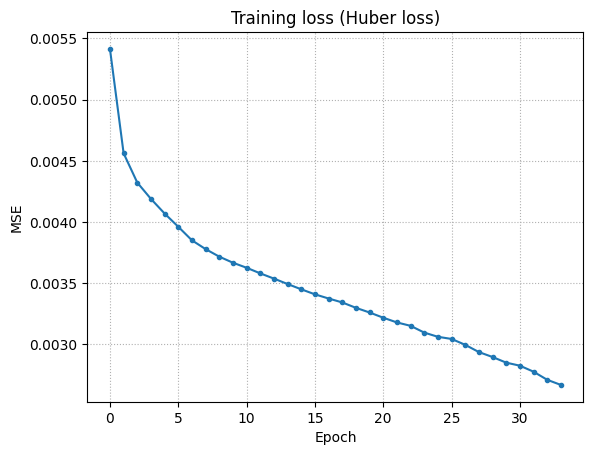

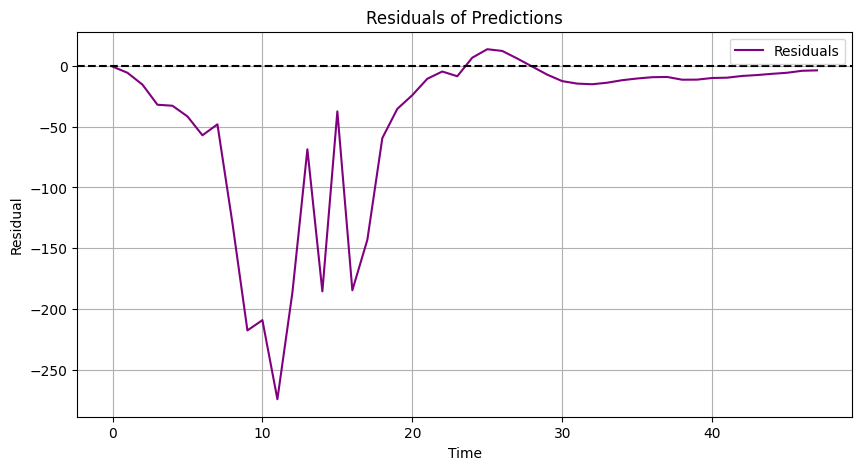

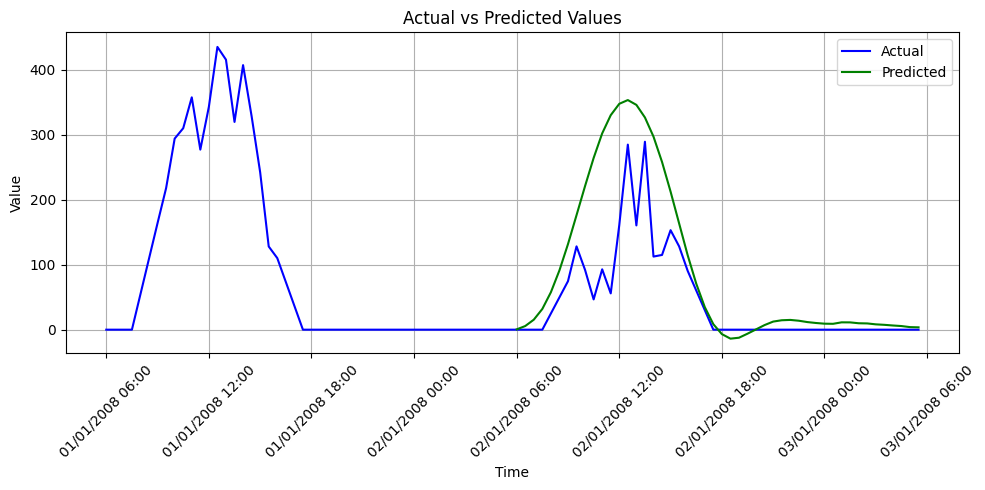

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


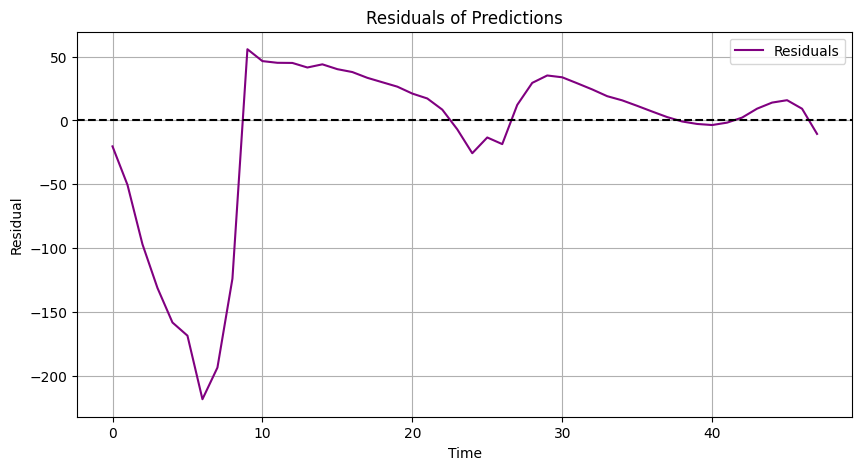

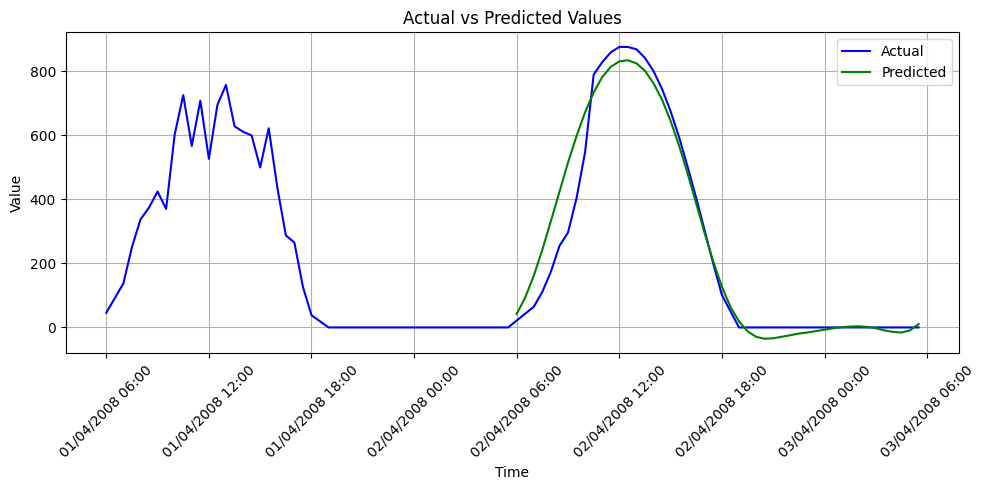

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


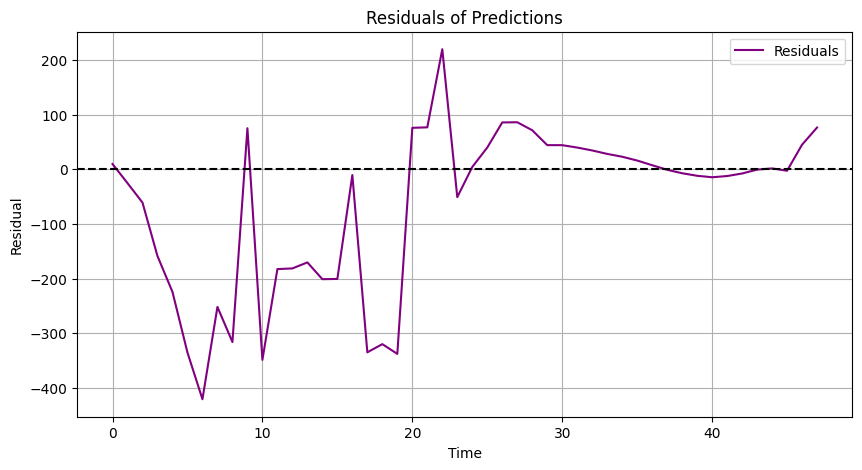

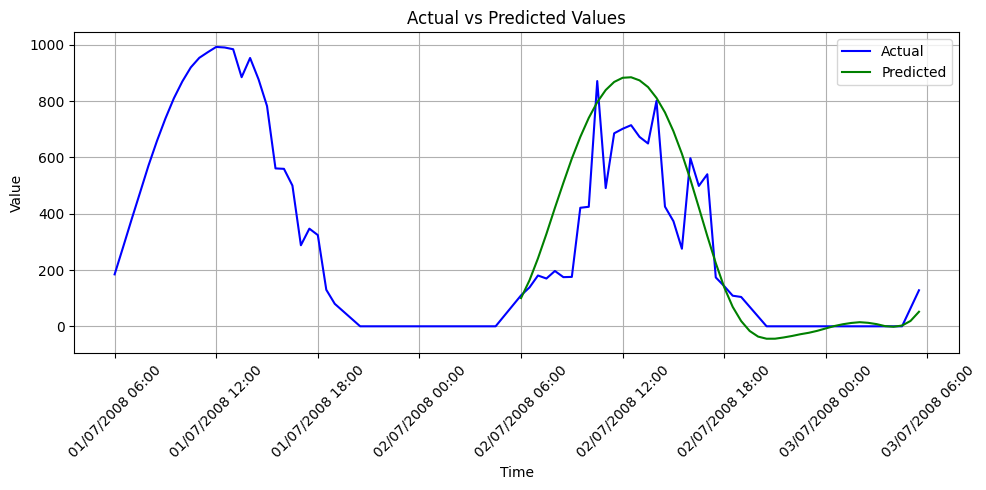

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


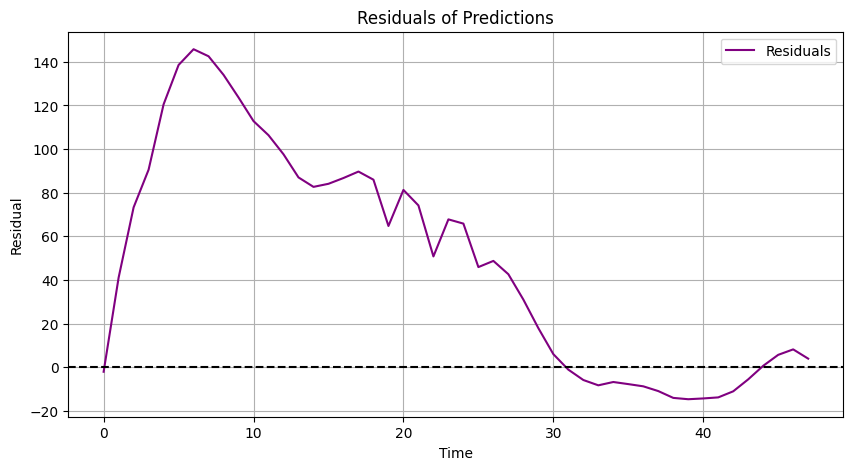

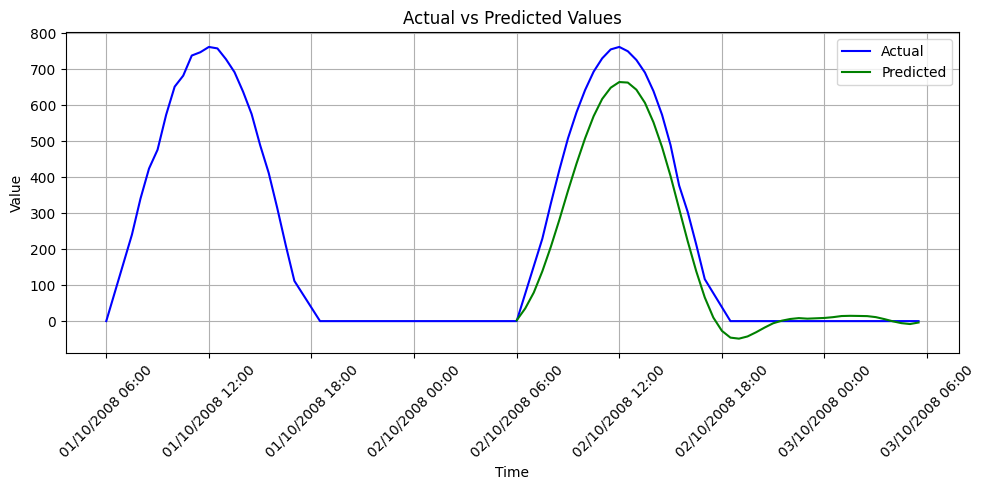

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look72_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look72_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


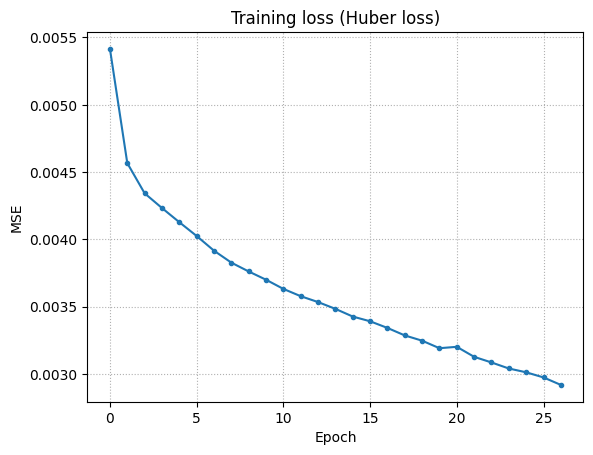

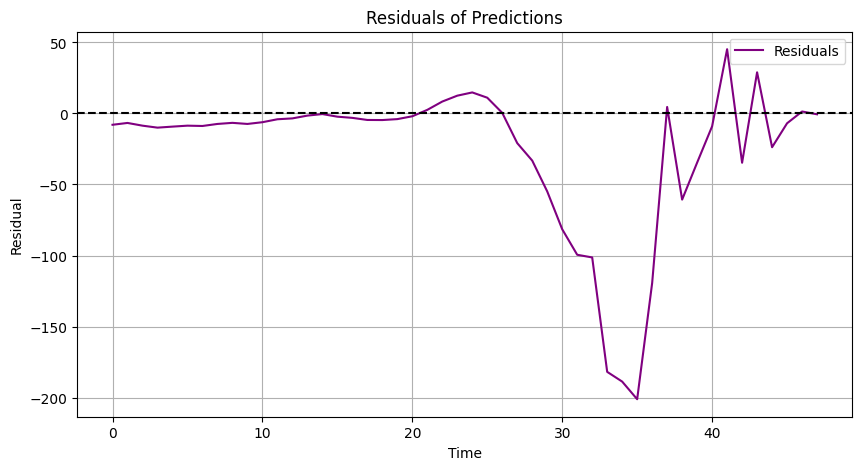

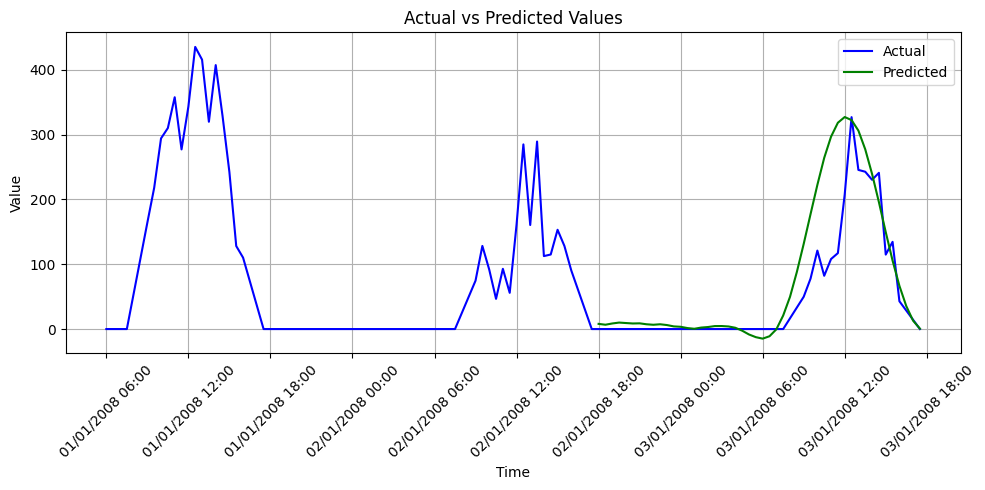

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


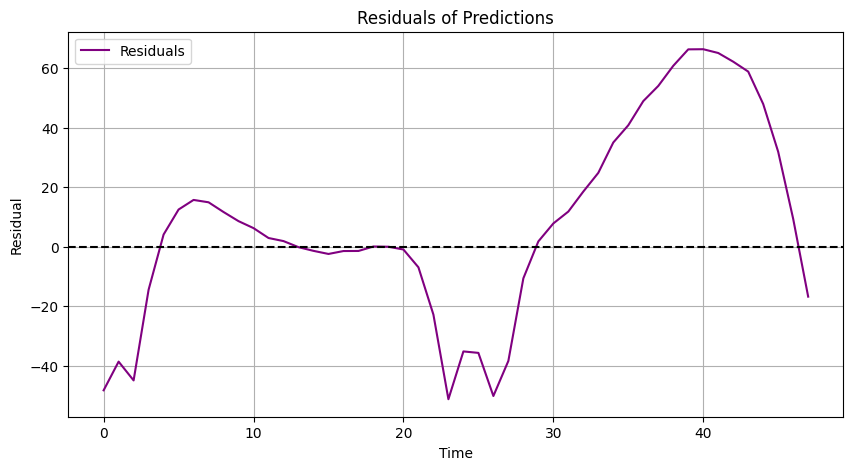

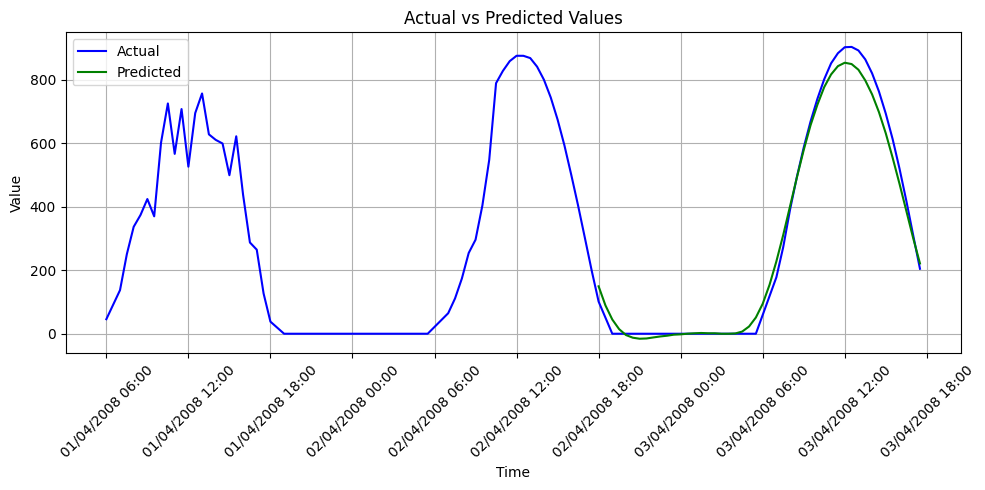

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


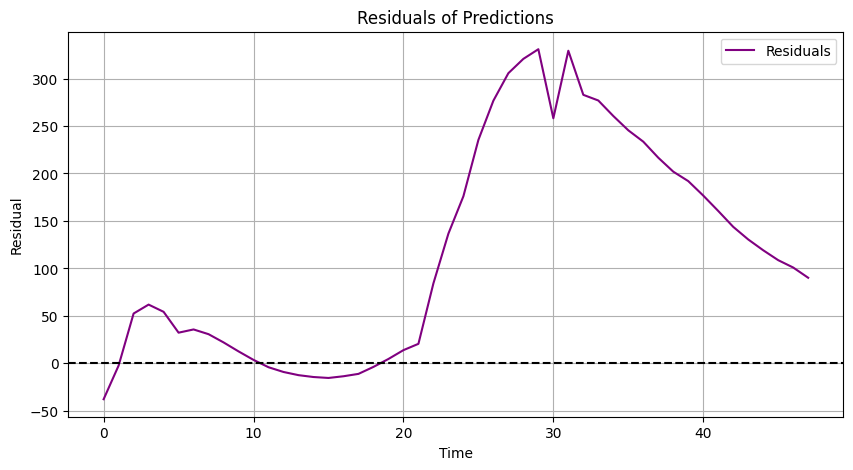

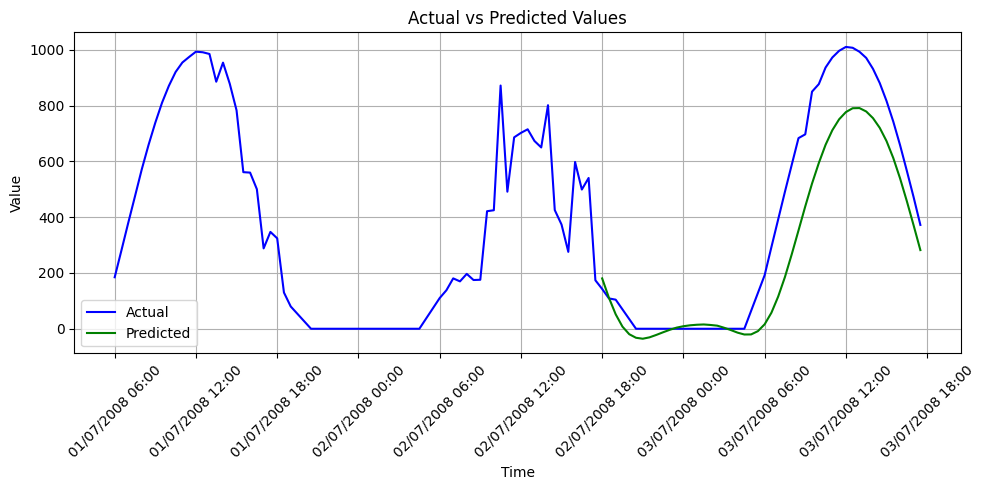

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


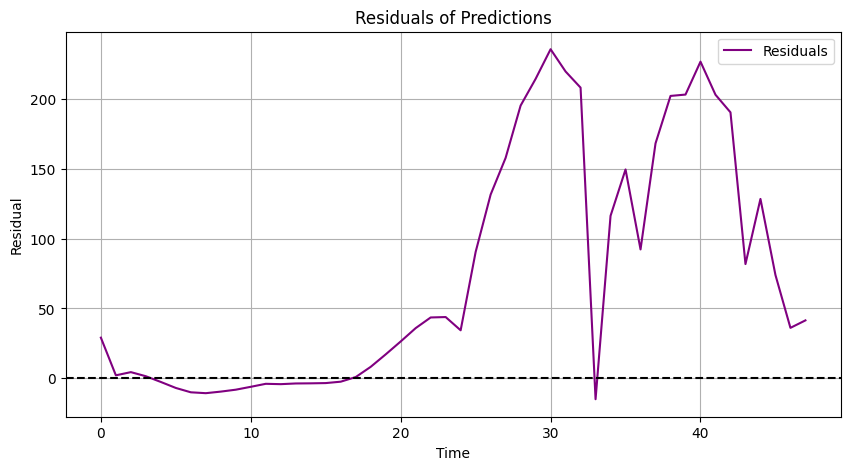

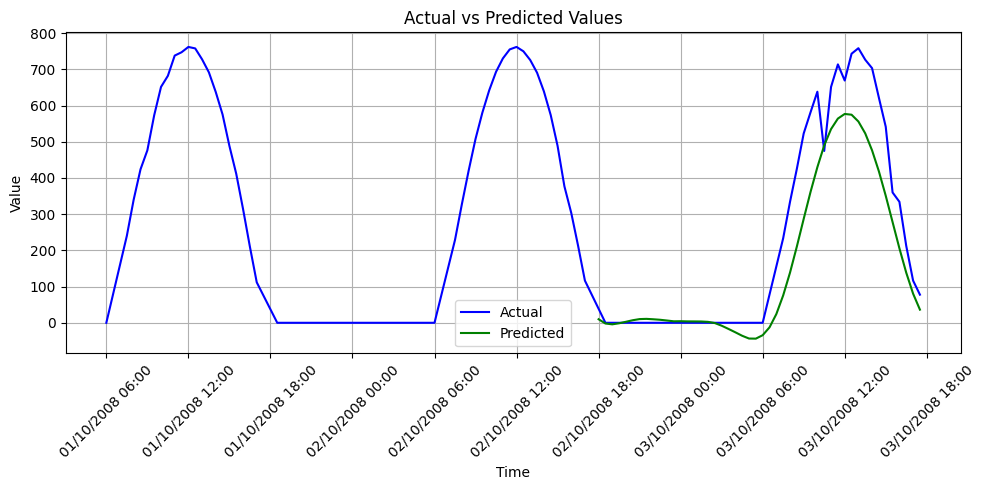

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look96_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look96_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


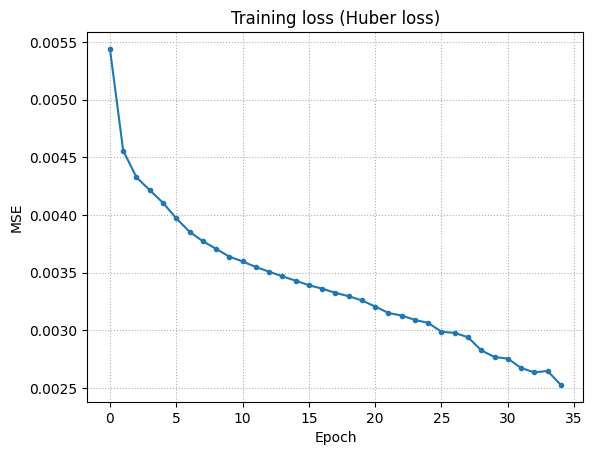

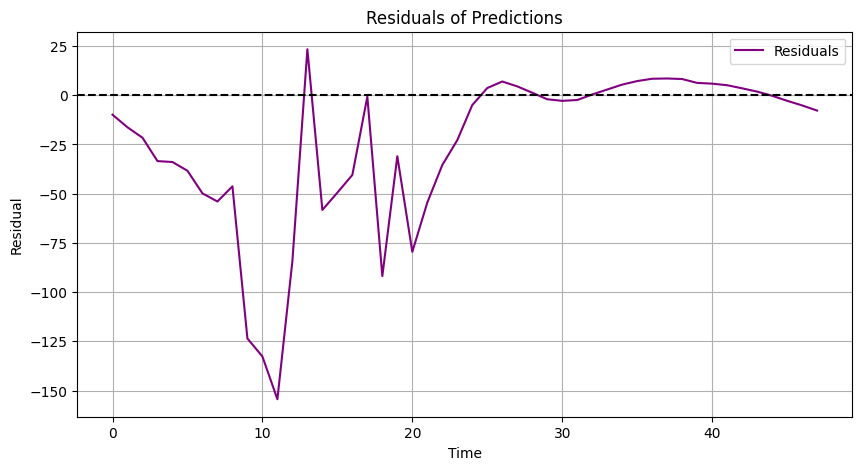

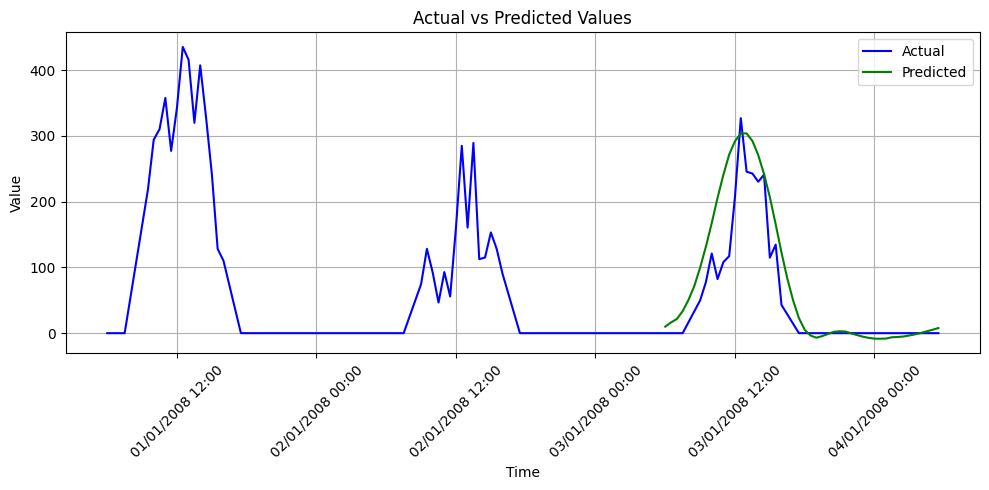

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


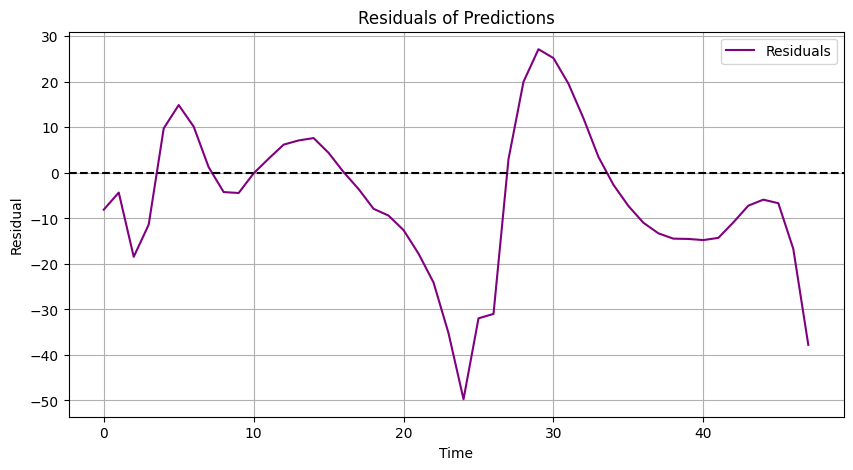

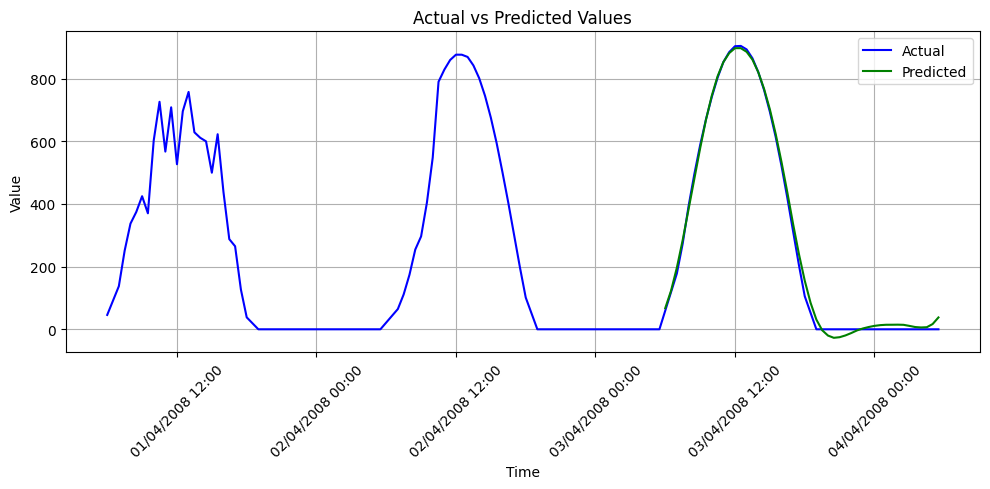

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


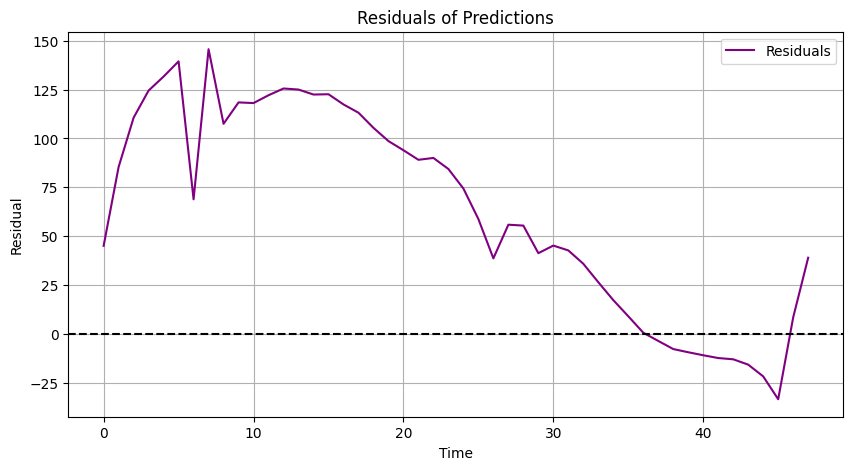

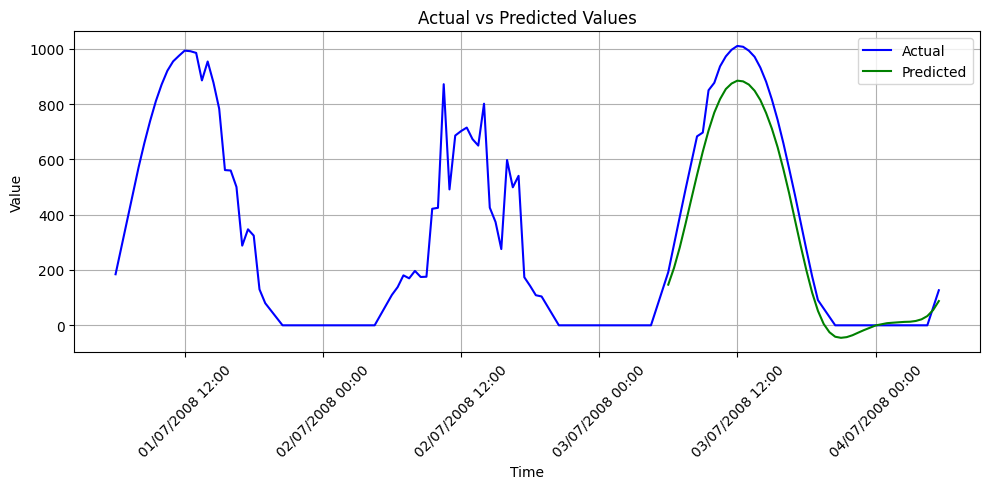

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


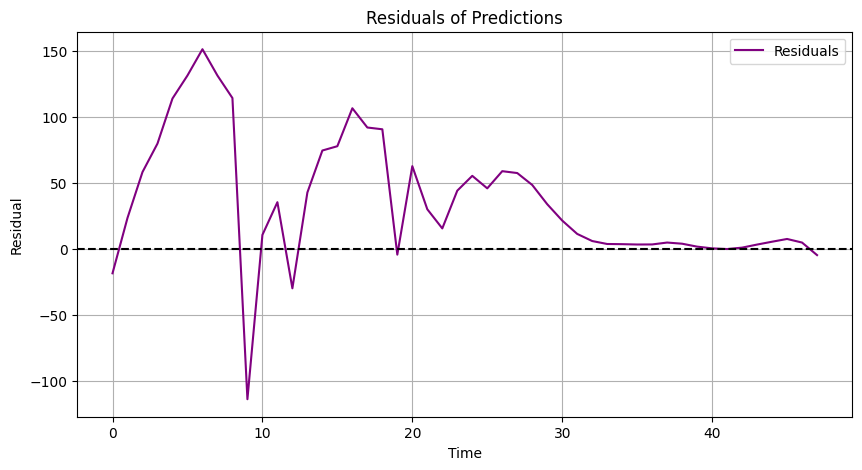

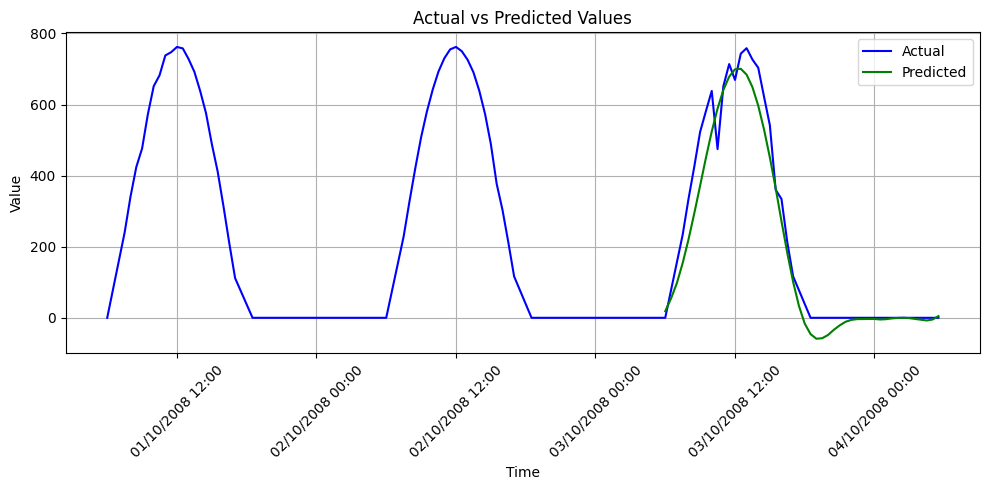

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look48_overlap24_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look48_overlap24_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


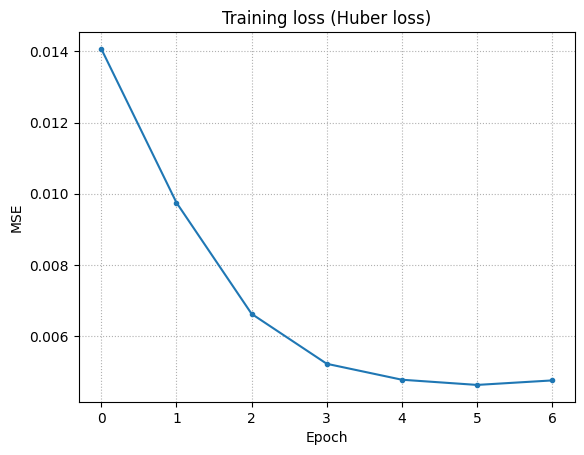

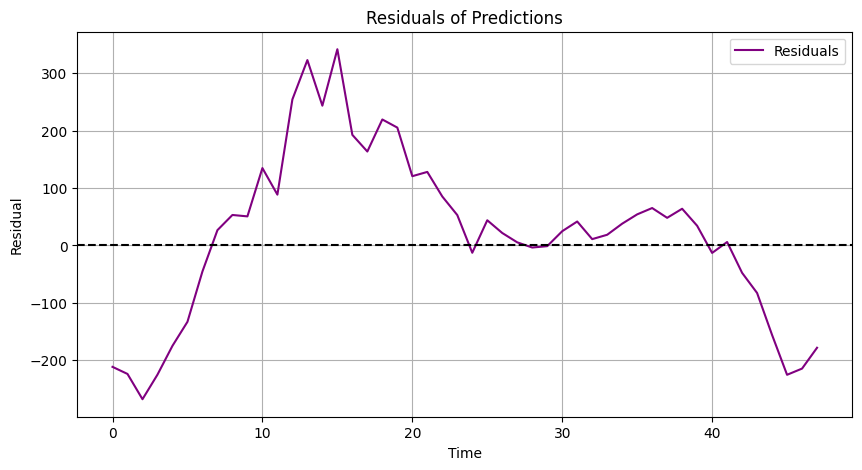

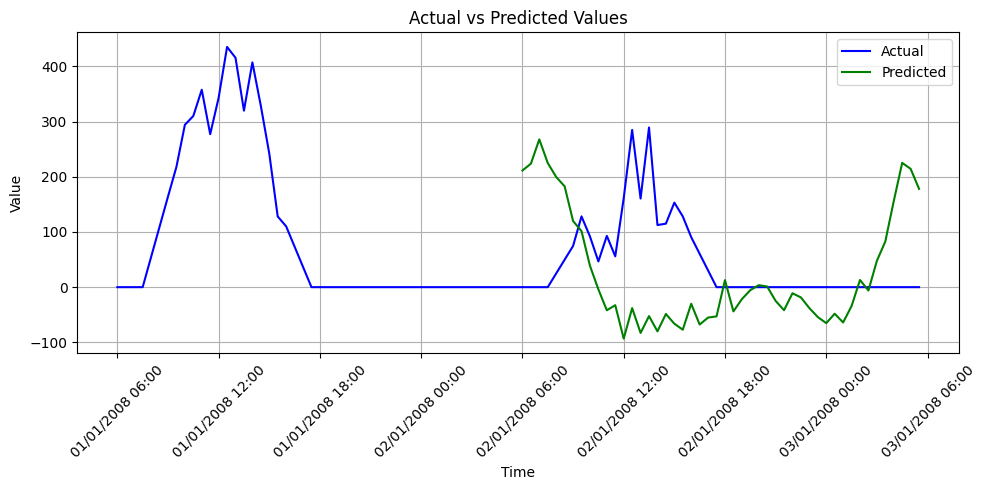

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


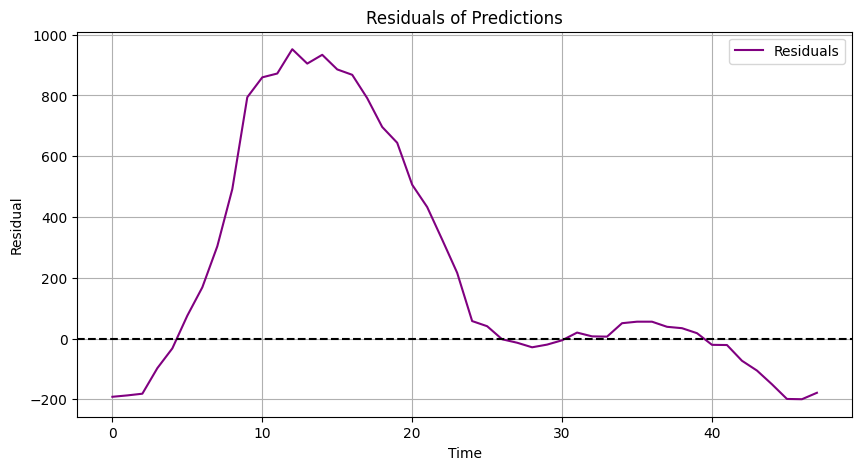

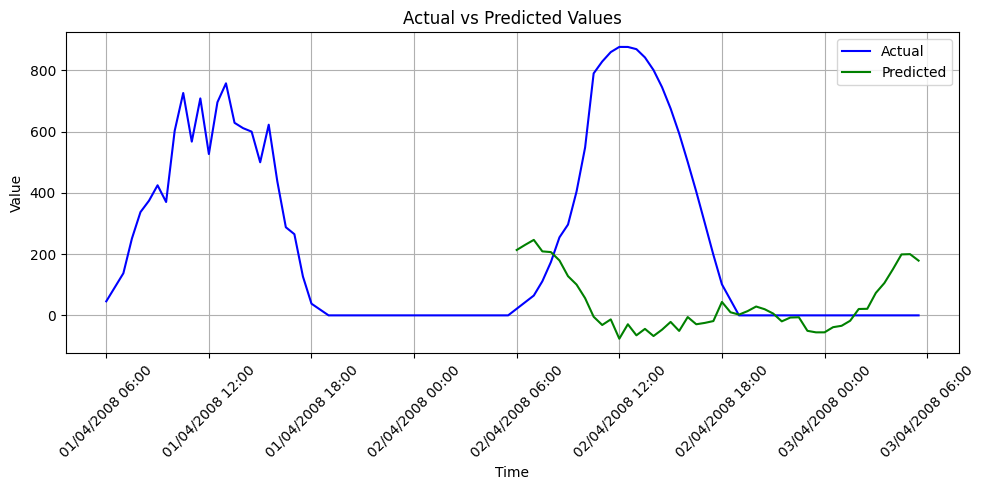

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


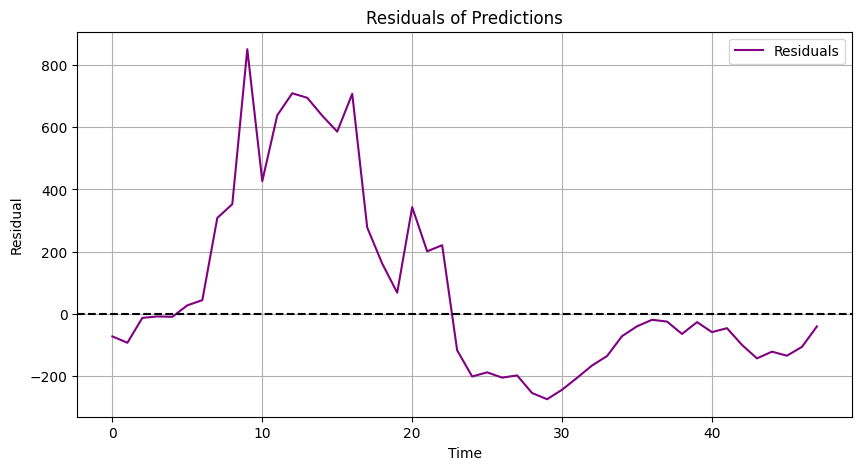

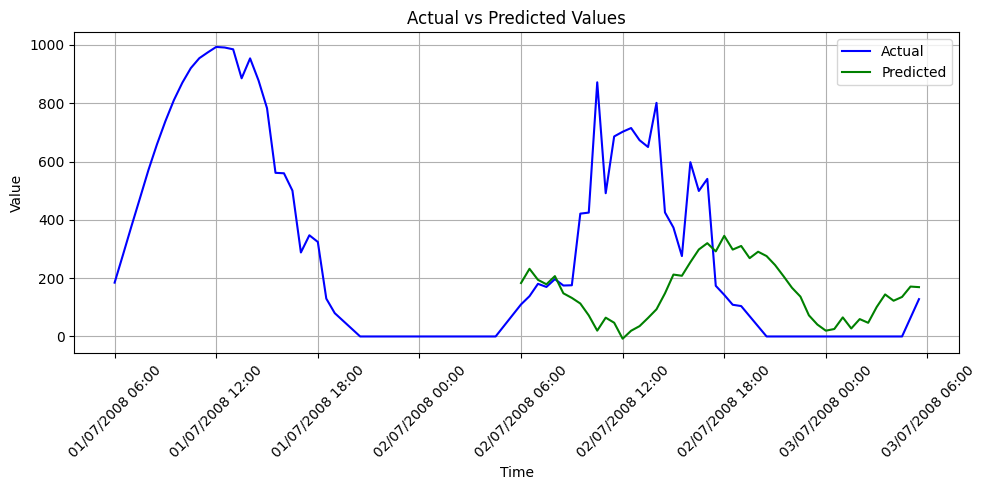

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


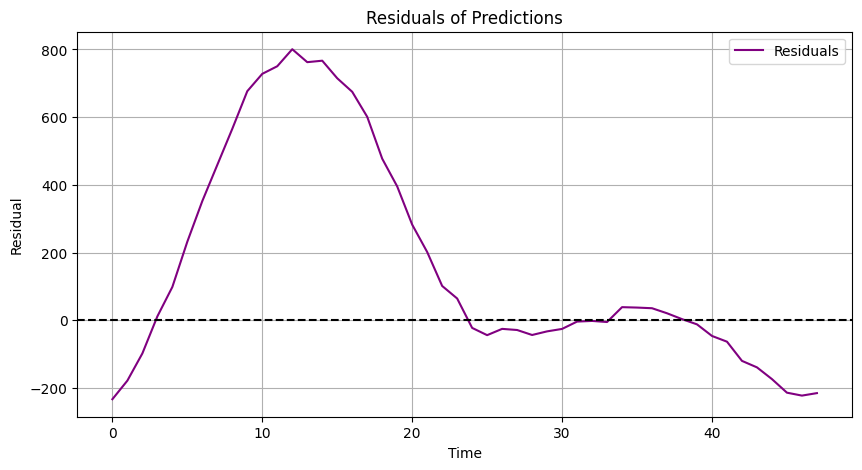

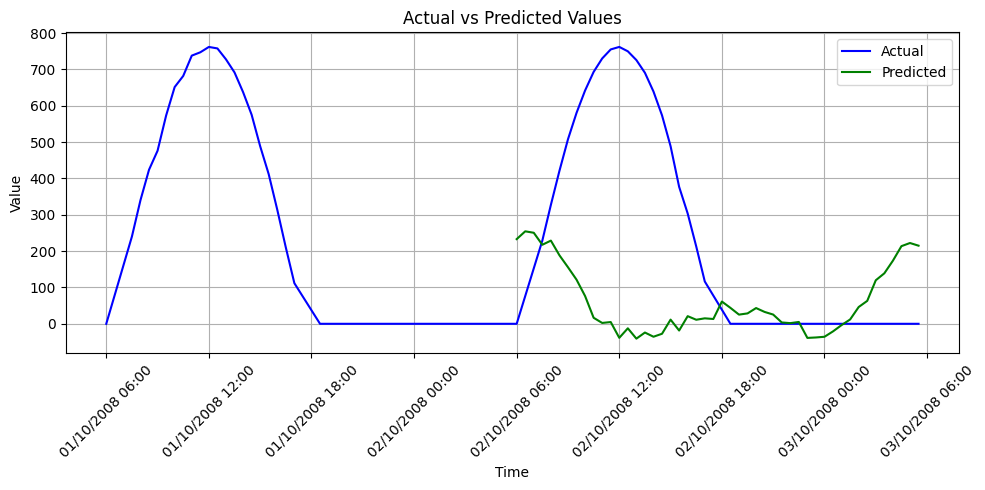

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look72_overlap36_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look72_overlap36_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


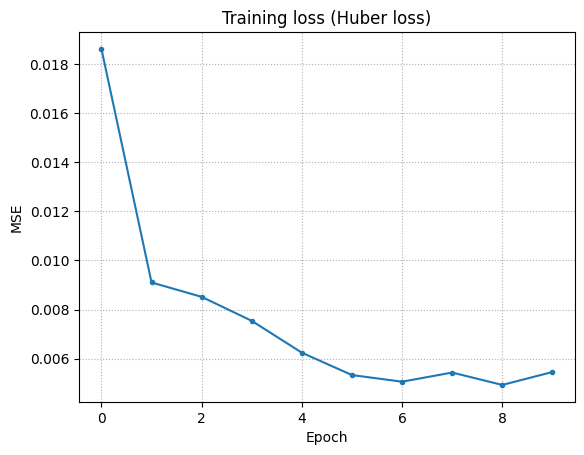

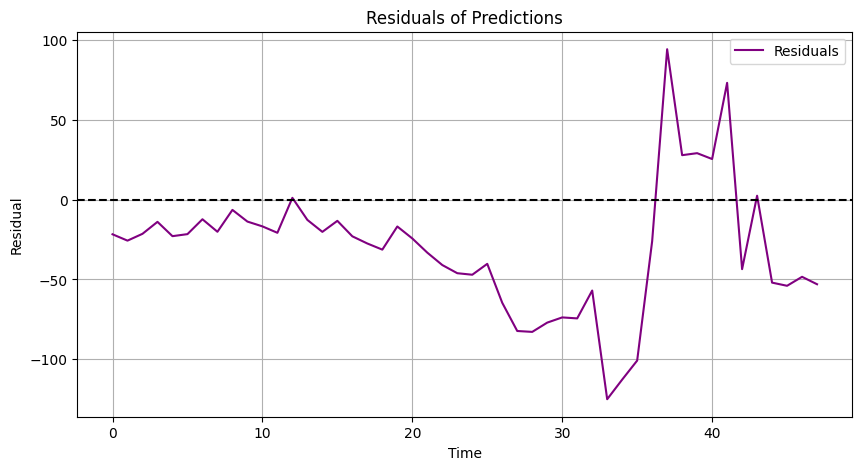

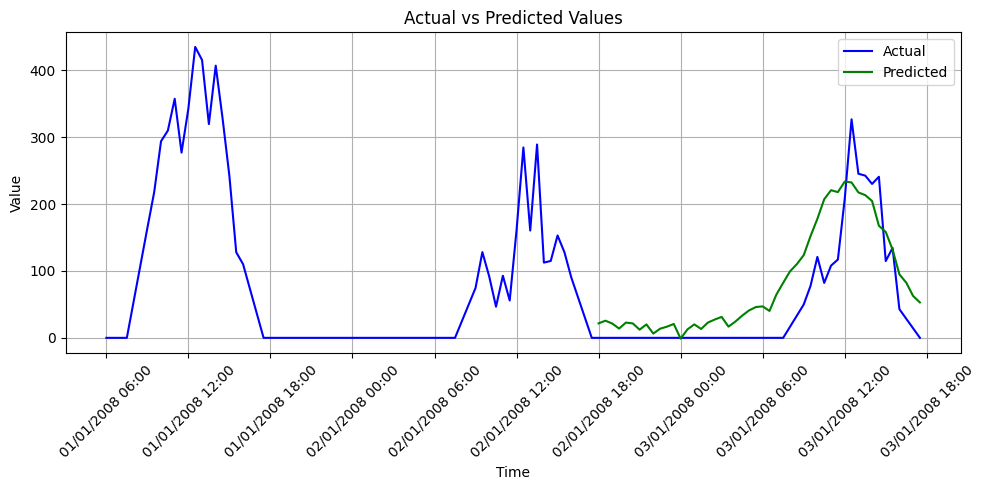

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


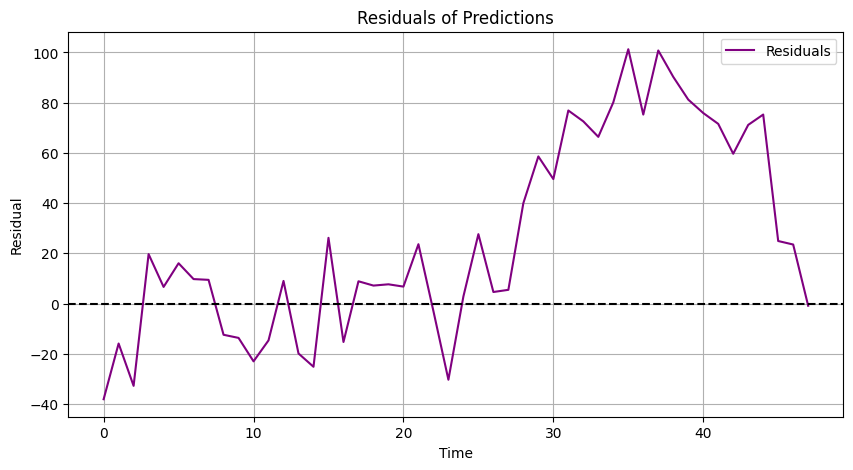

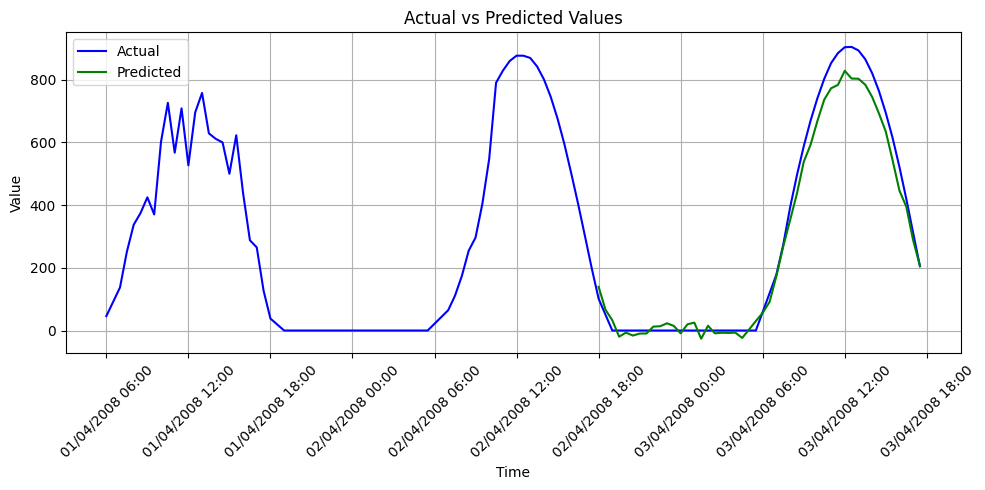

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


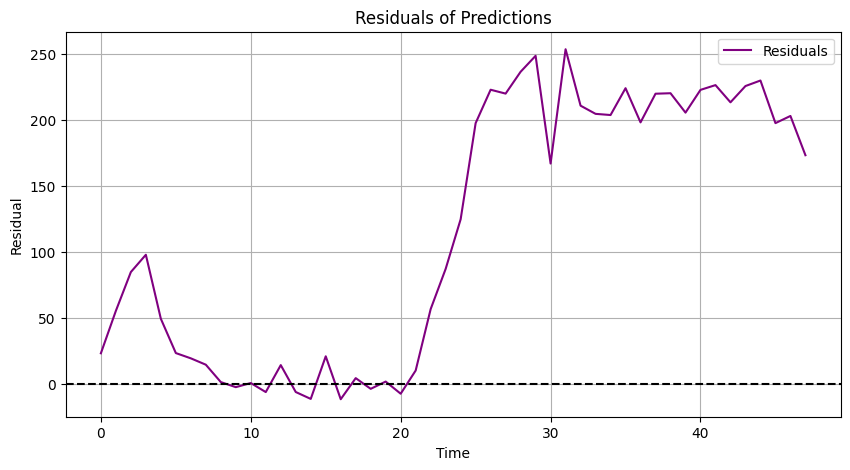

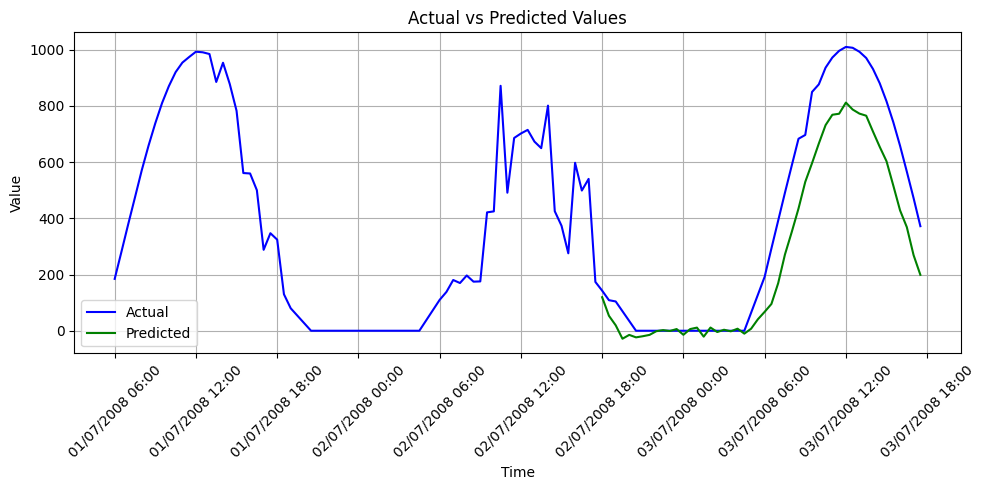

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


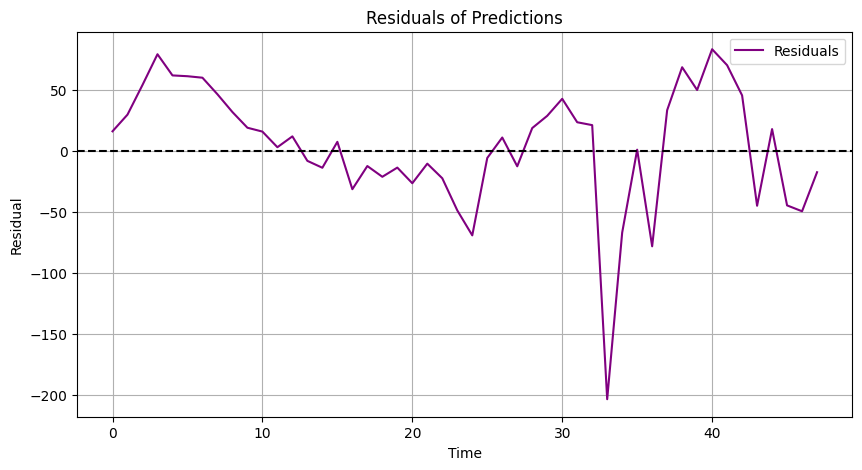

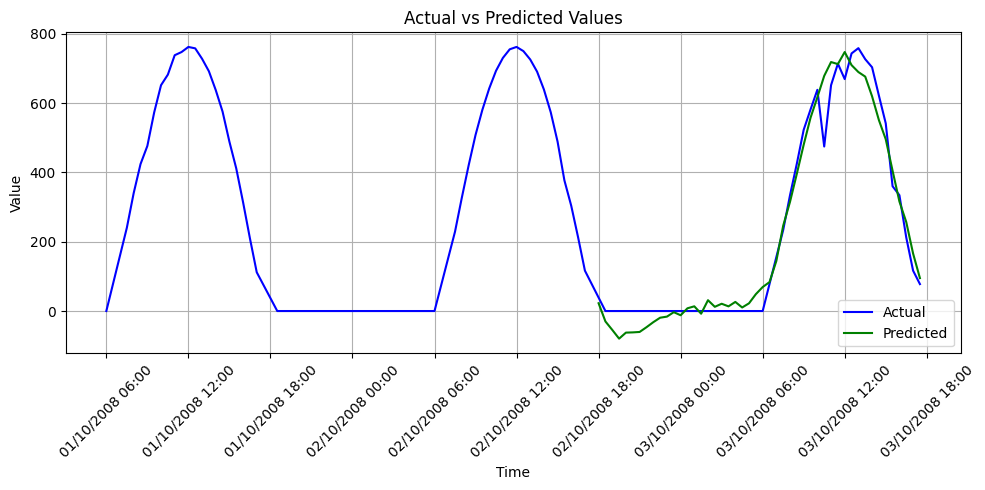

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look96_overlap48_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look96_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


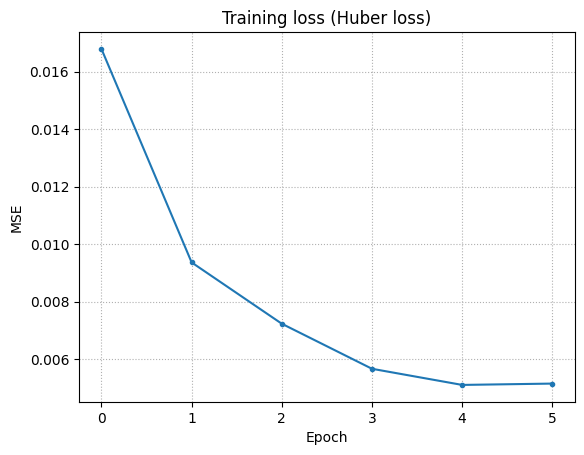

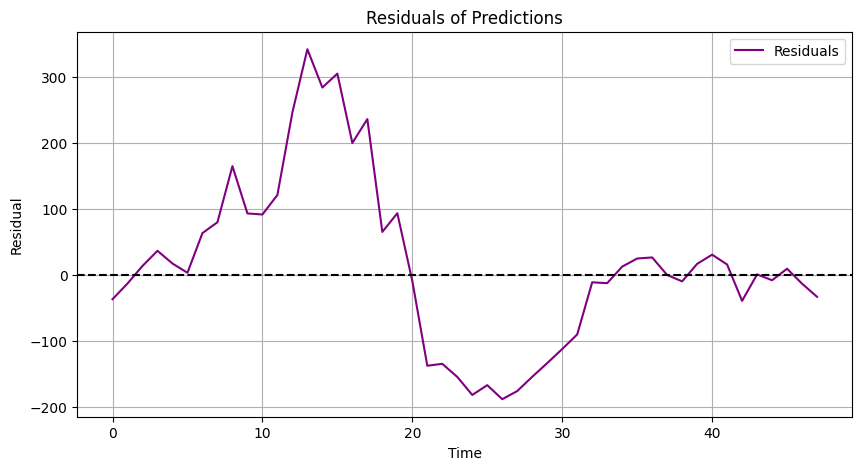

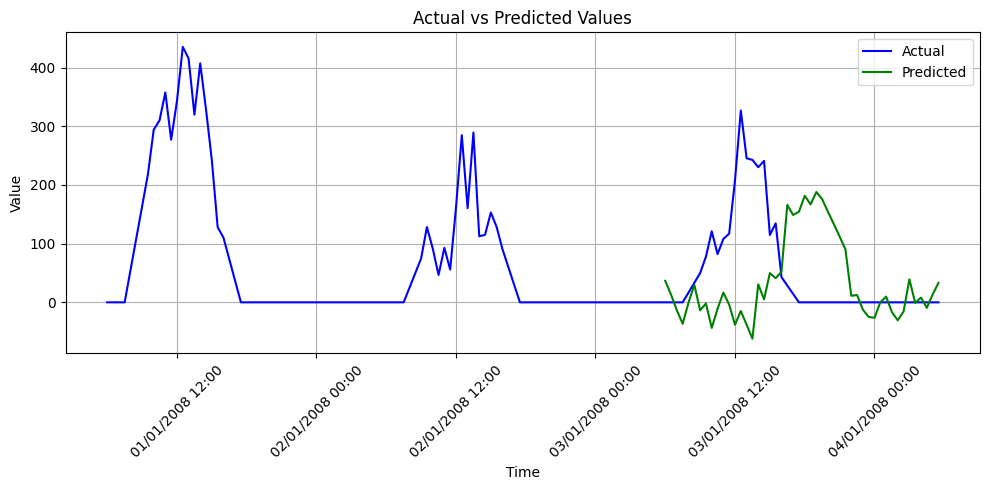

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


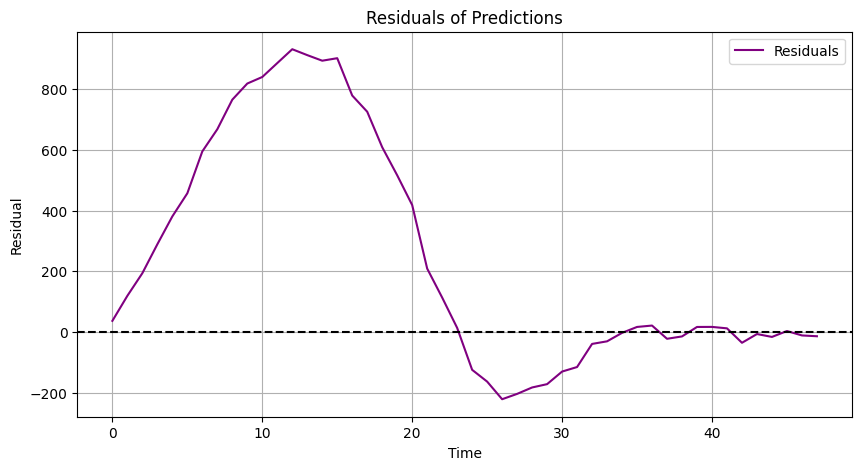

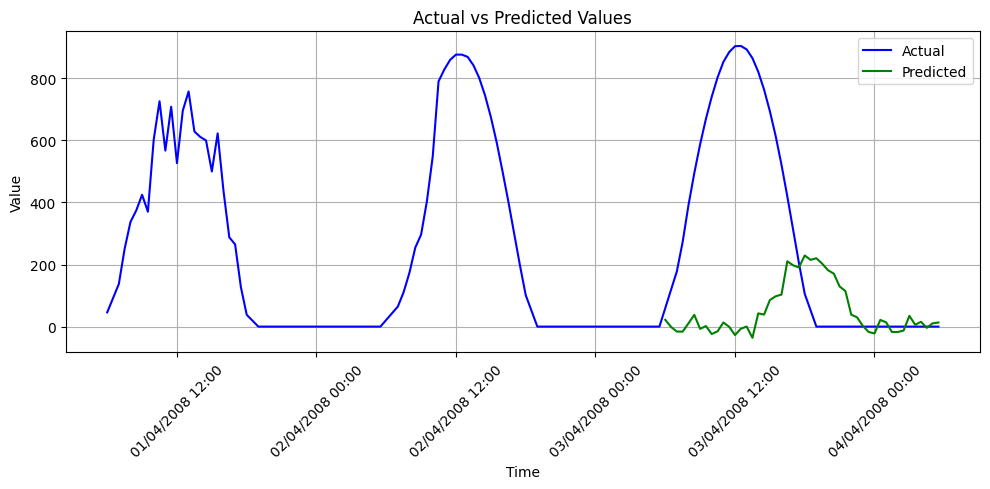

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


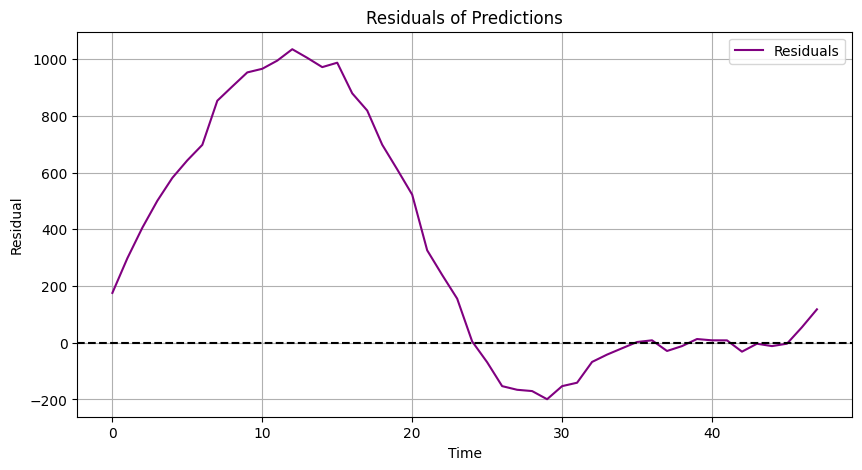

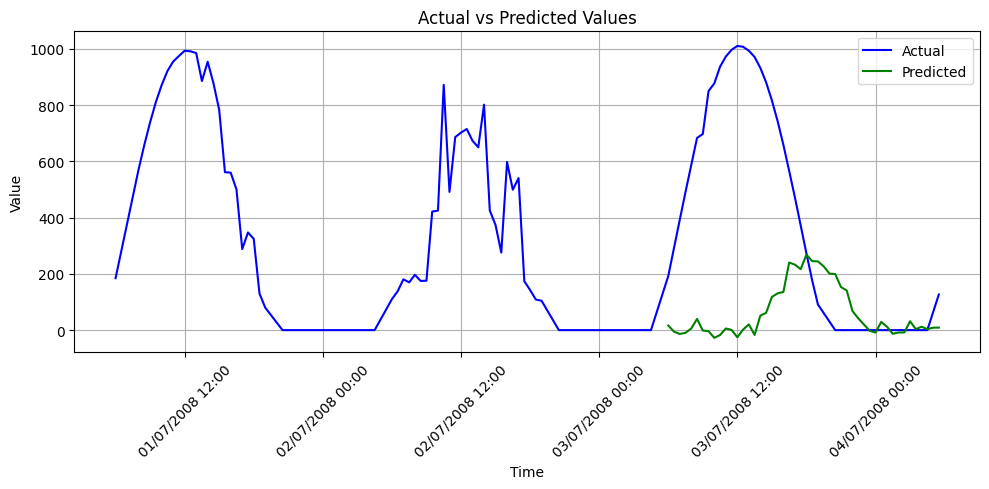

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


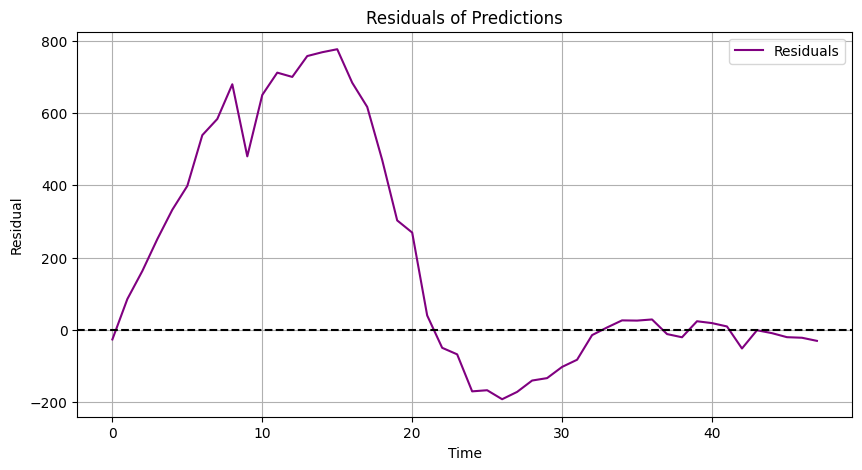

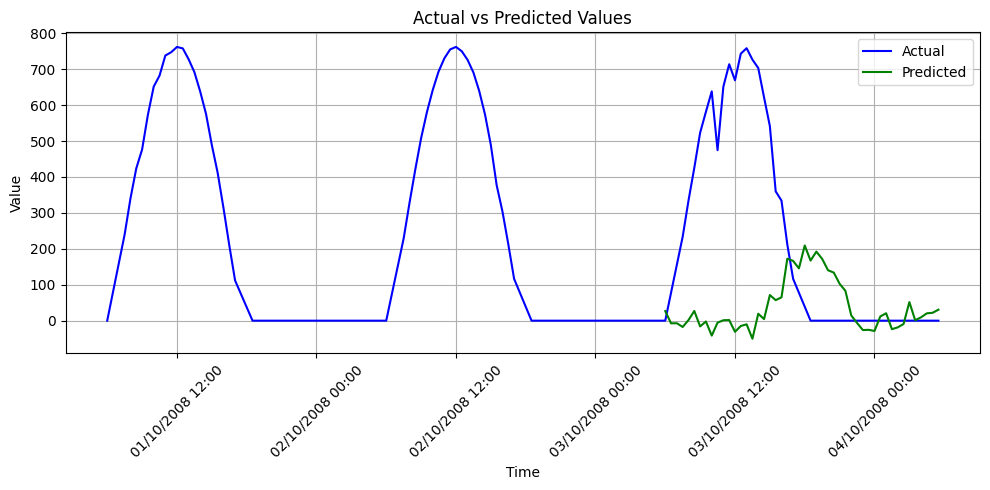

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look48_overlap48_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look48_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


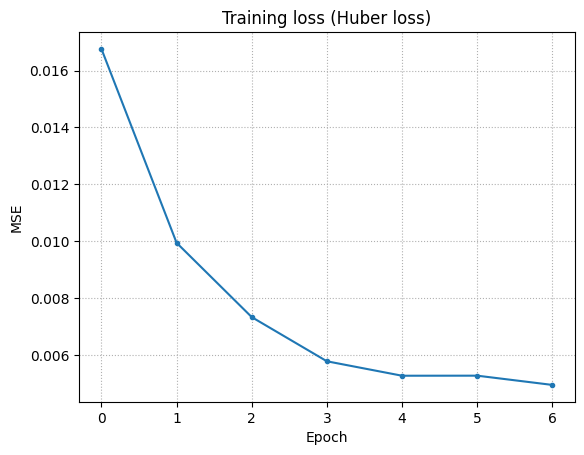

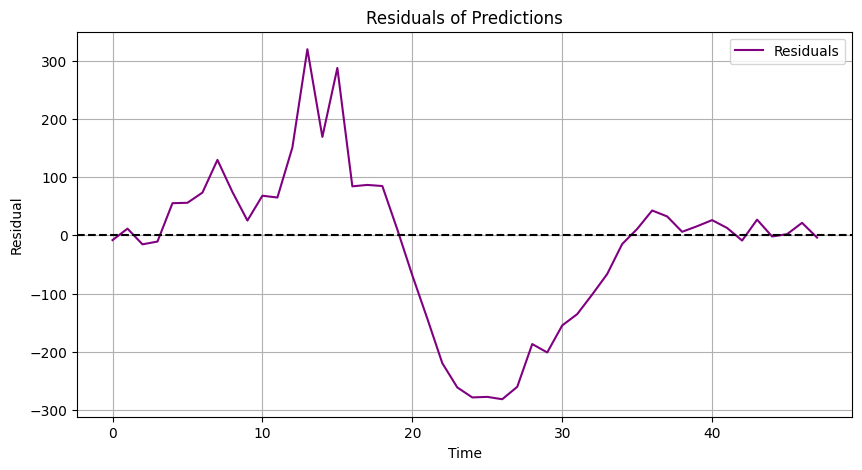

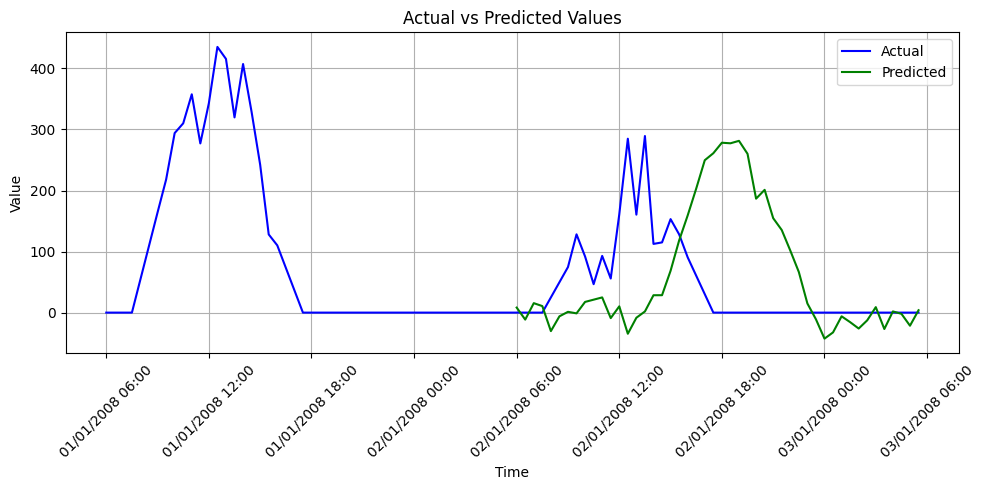

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


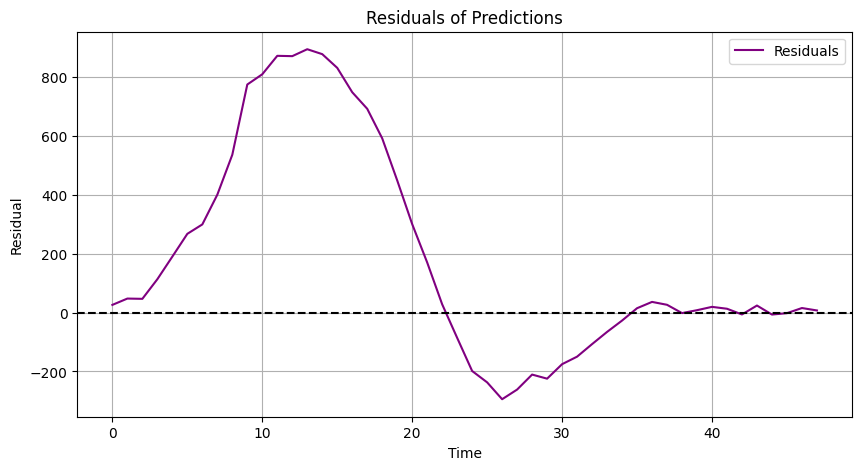

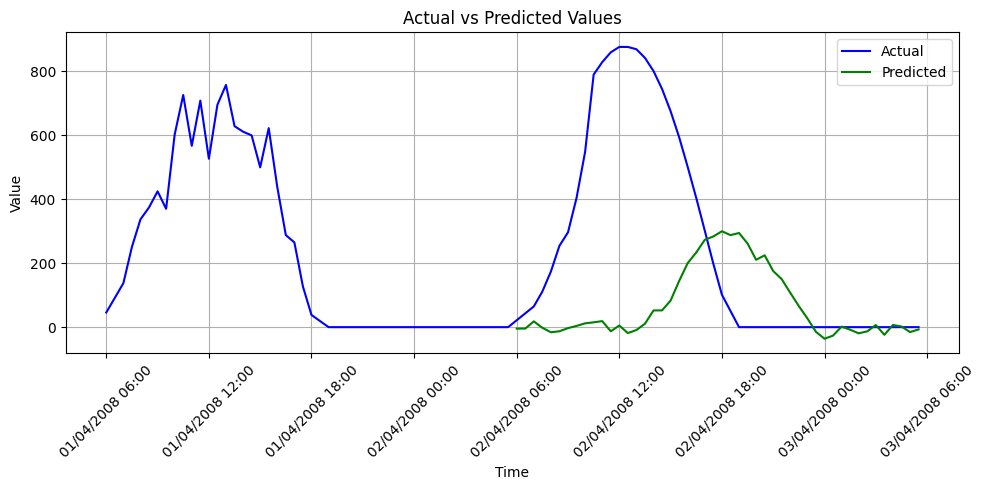

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


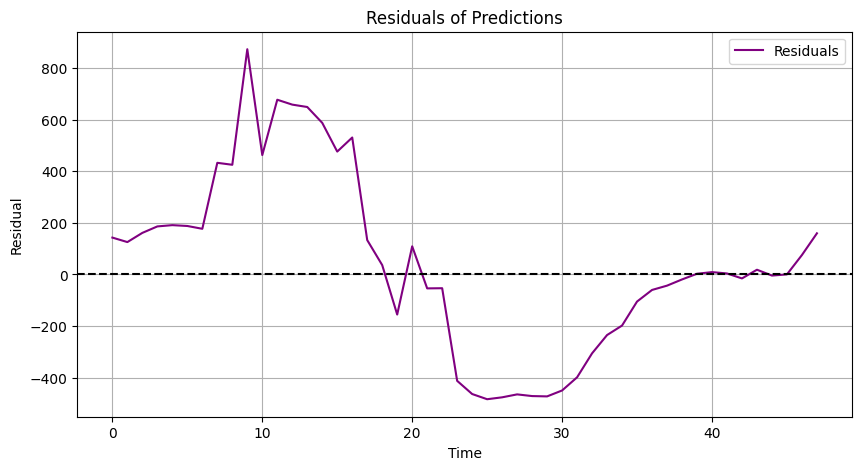

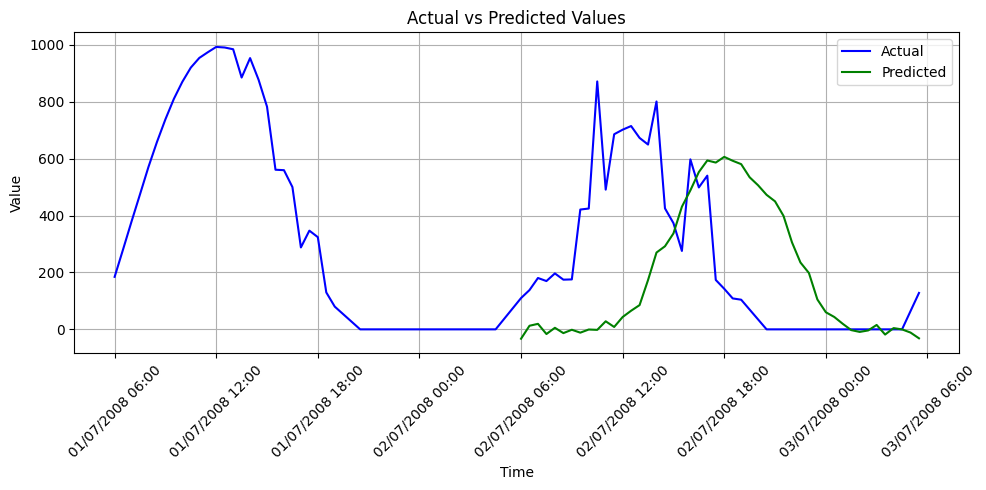

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


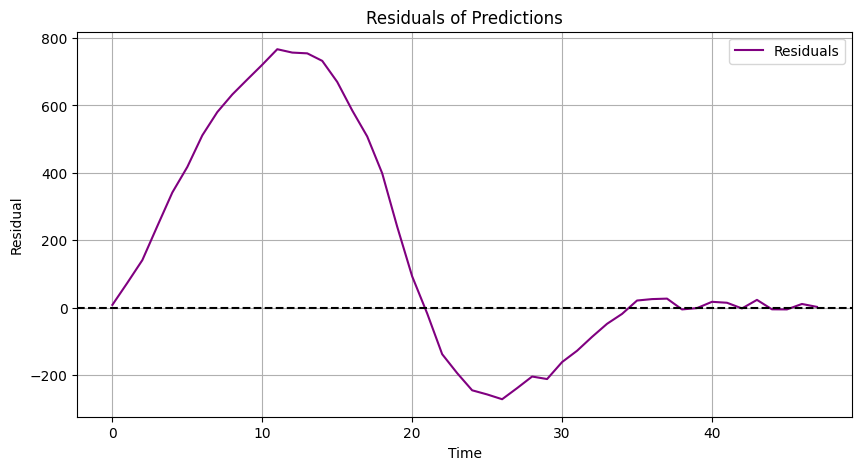

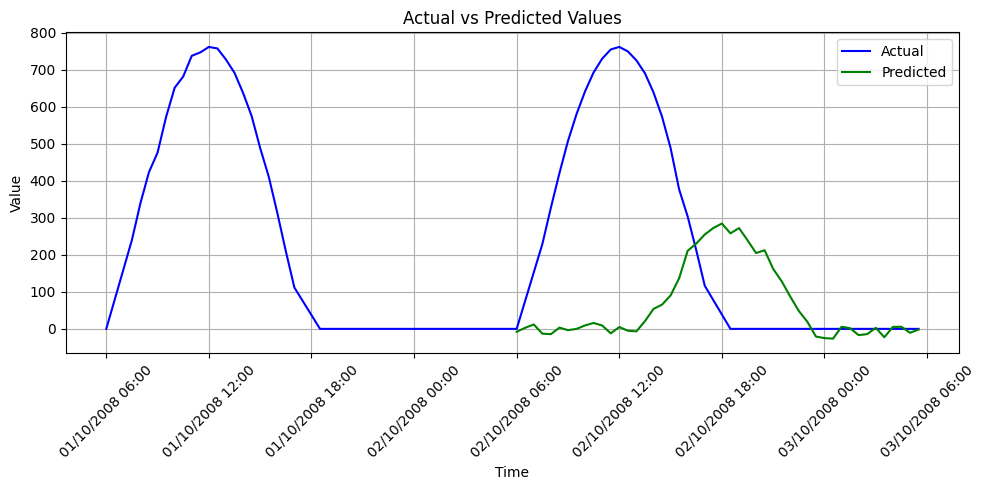

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look72_overlap72_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look72_overlap72_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


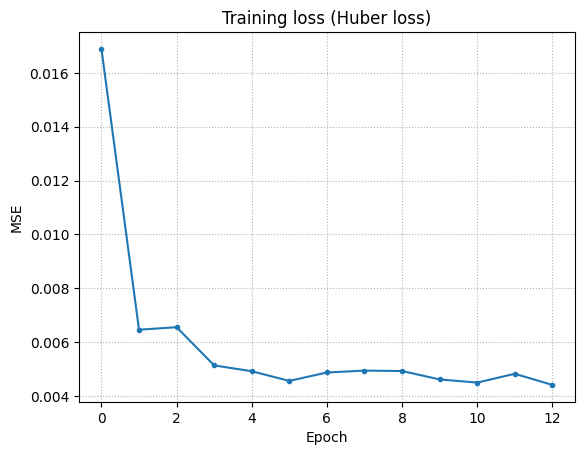

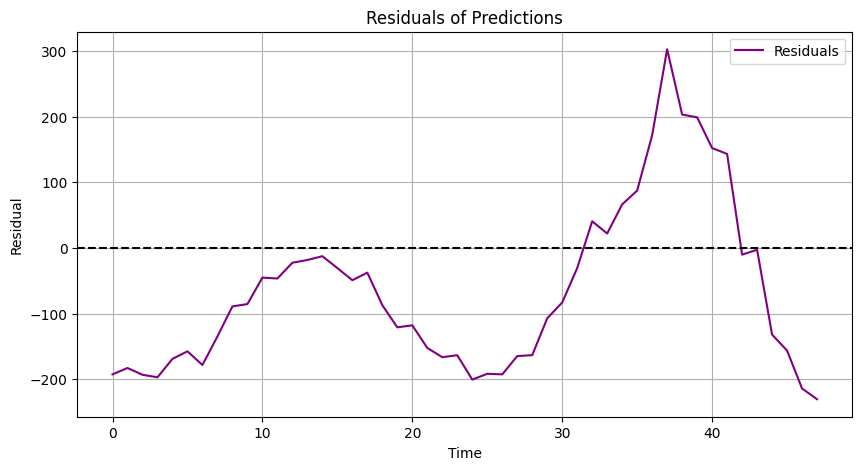

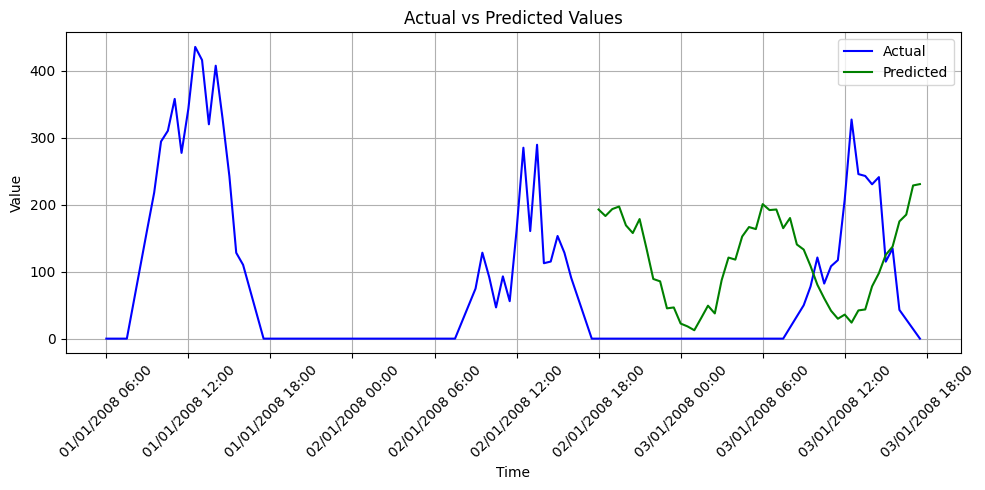

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


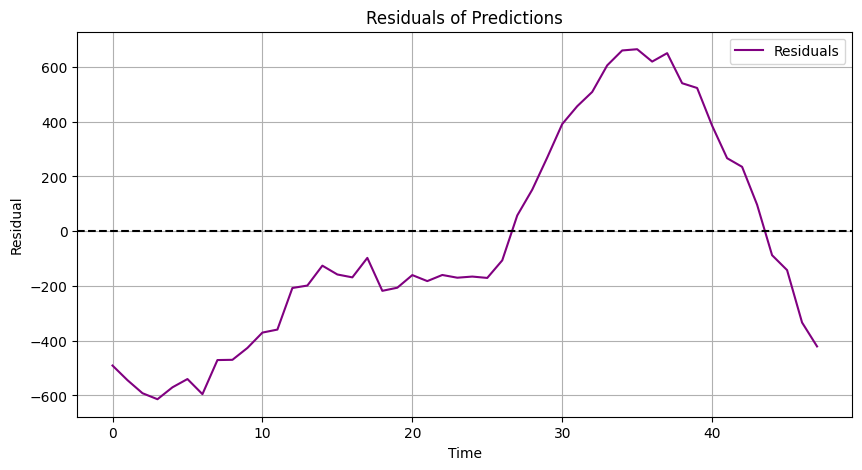

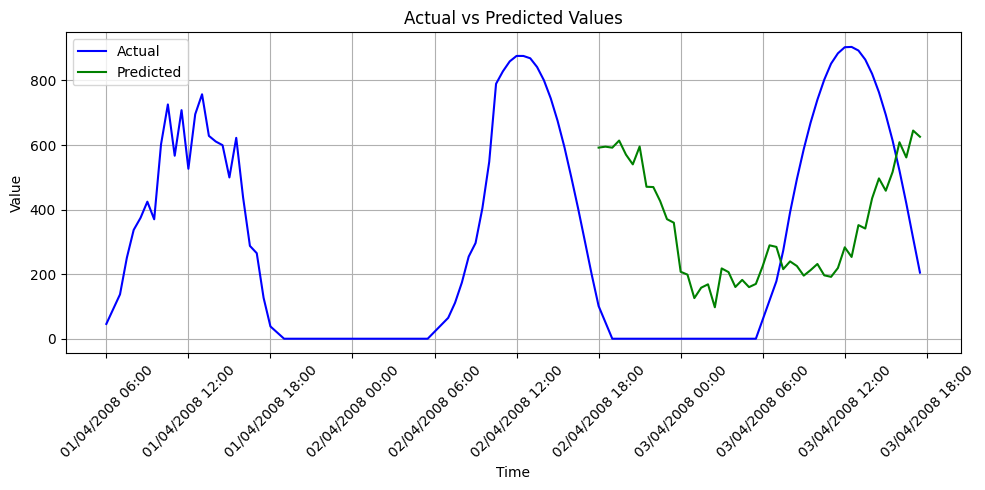

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


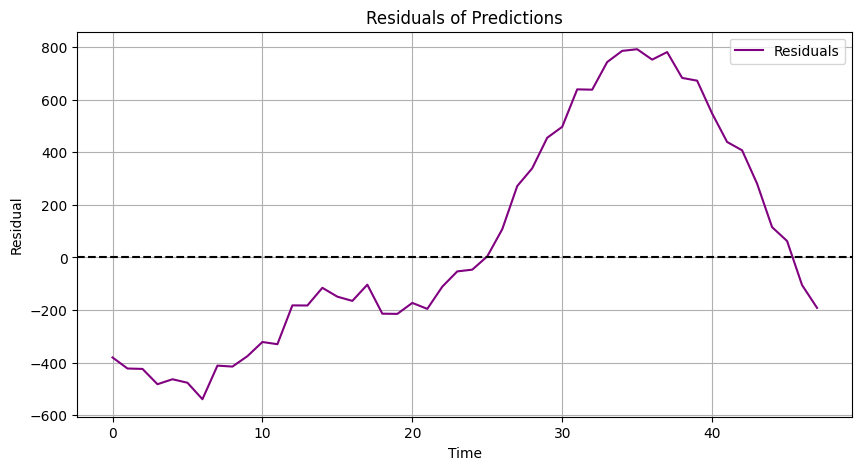

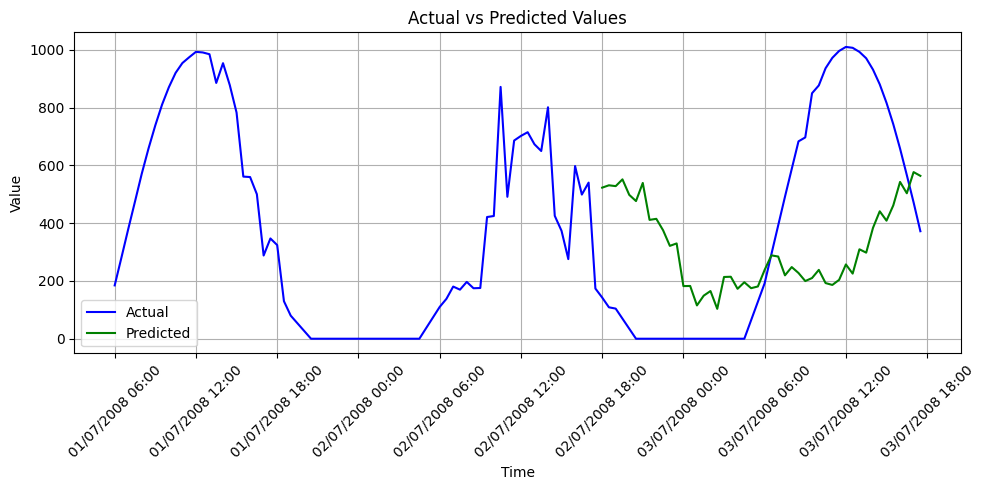

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


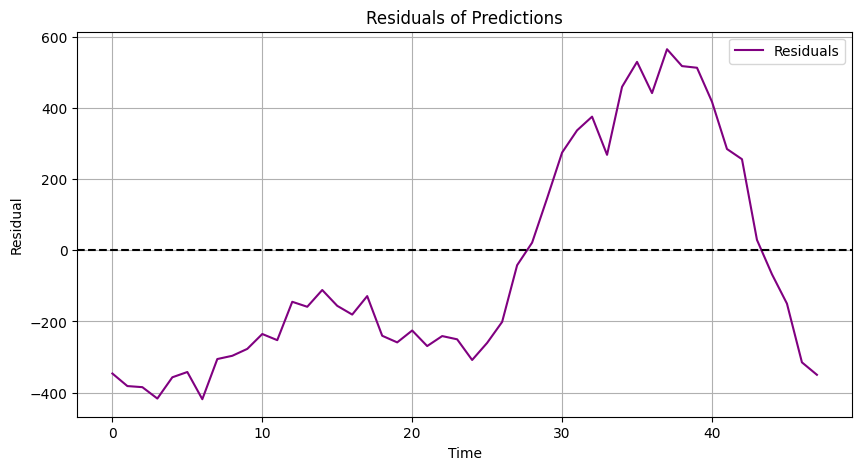

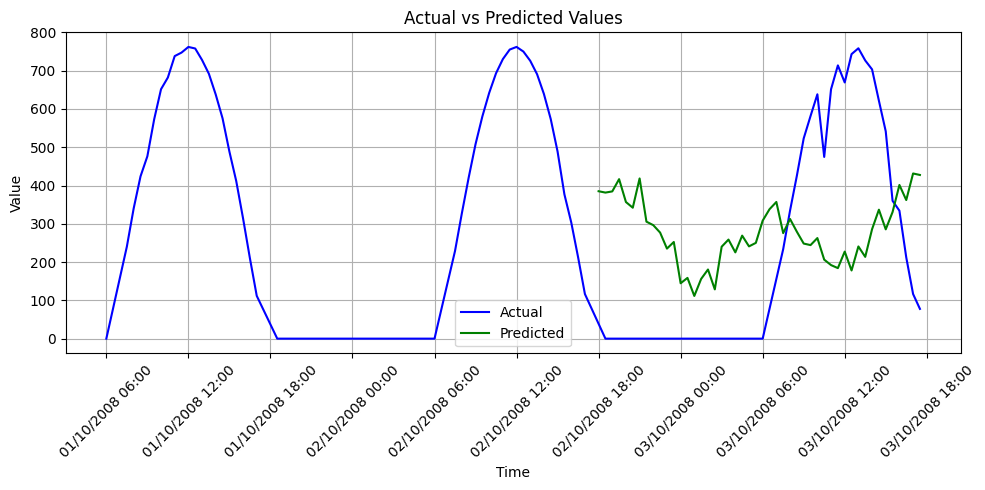

Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look96_overlap96_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_2_look96_overlap96_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


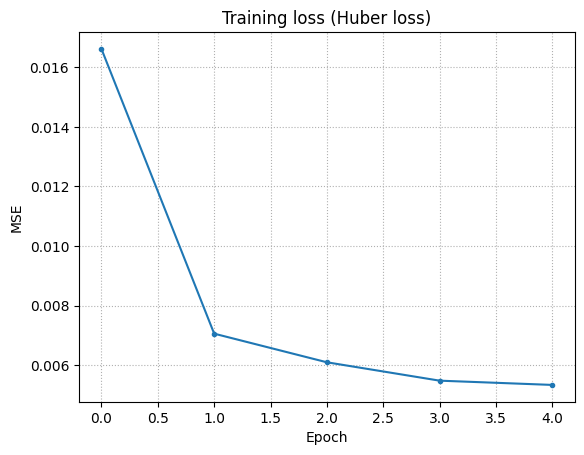

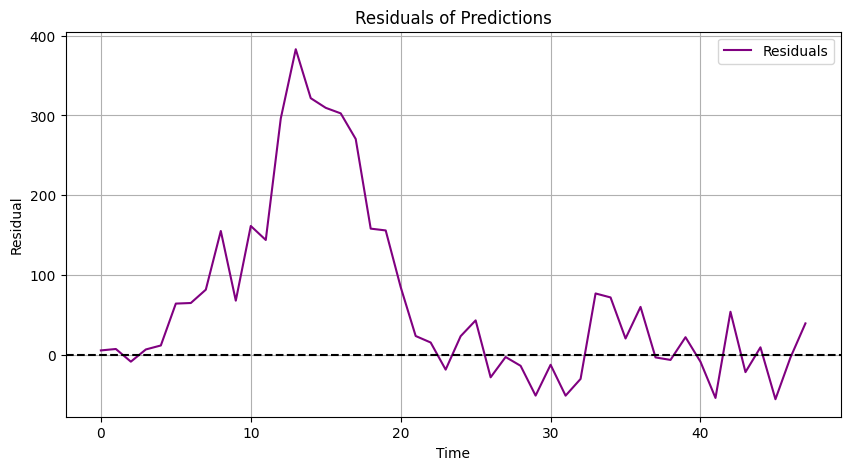

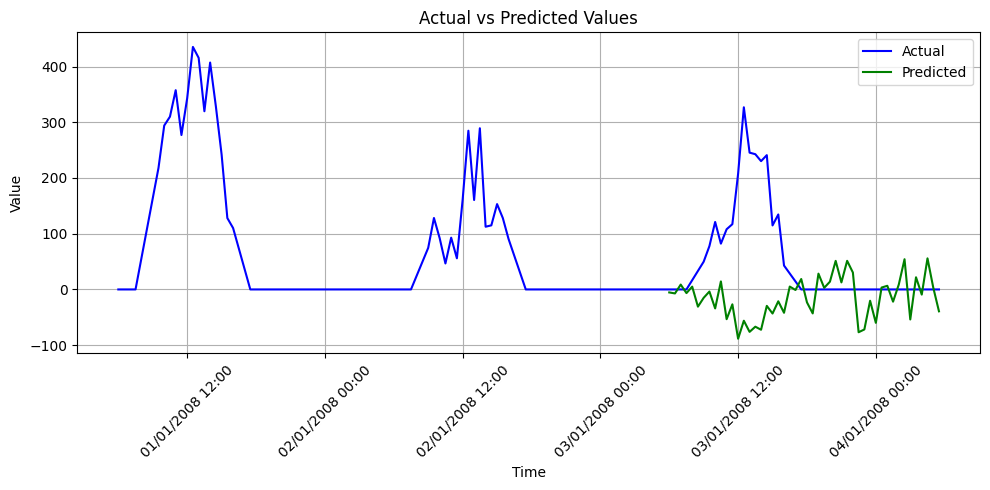

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


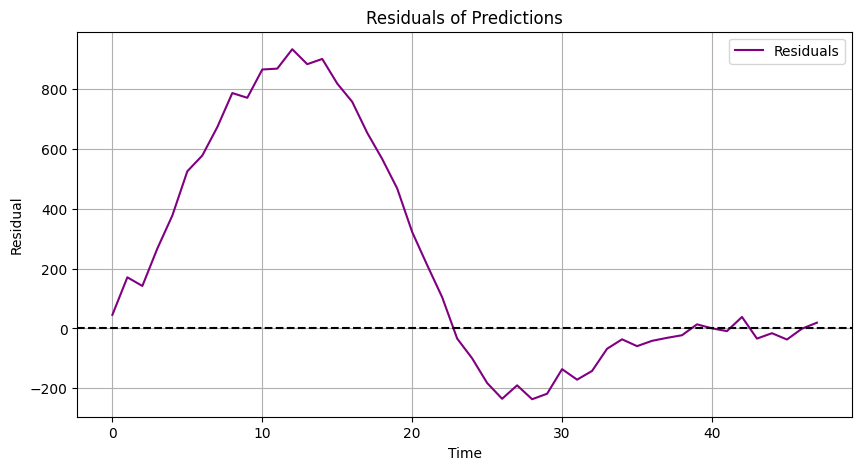

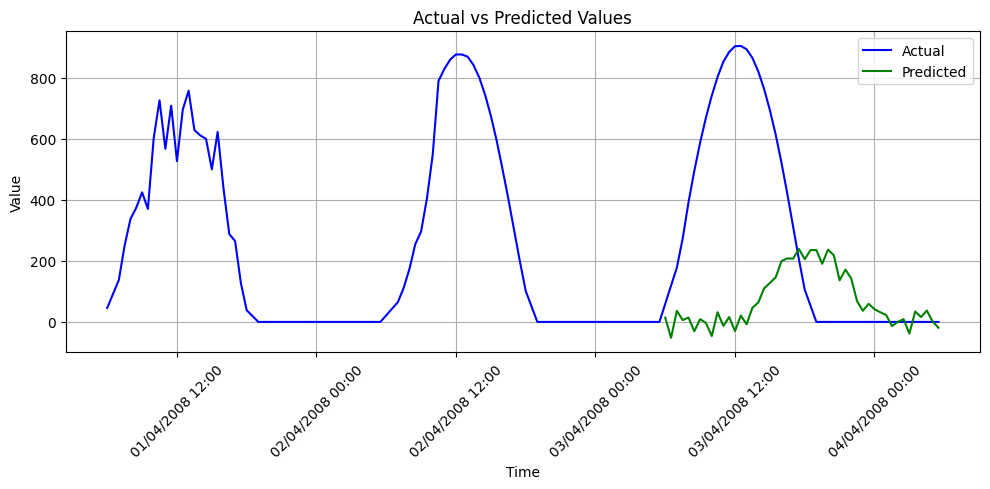

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


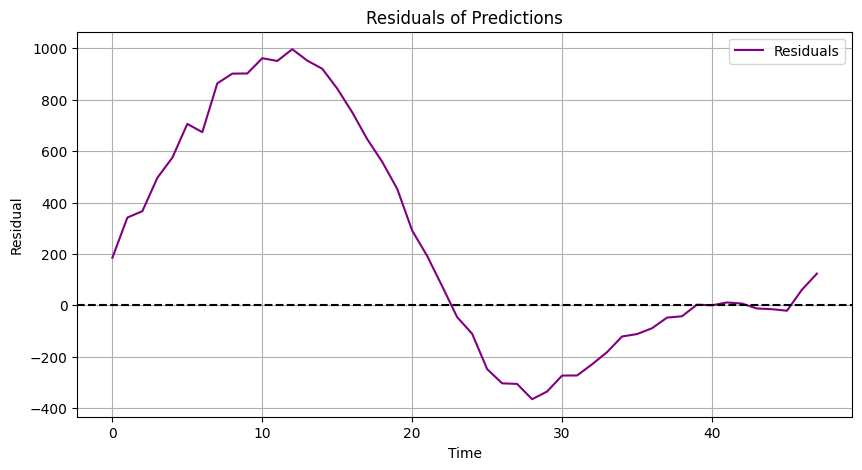

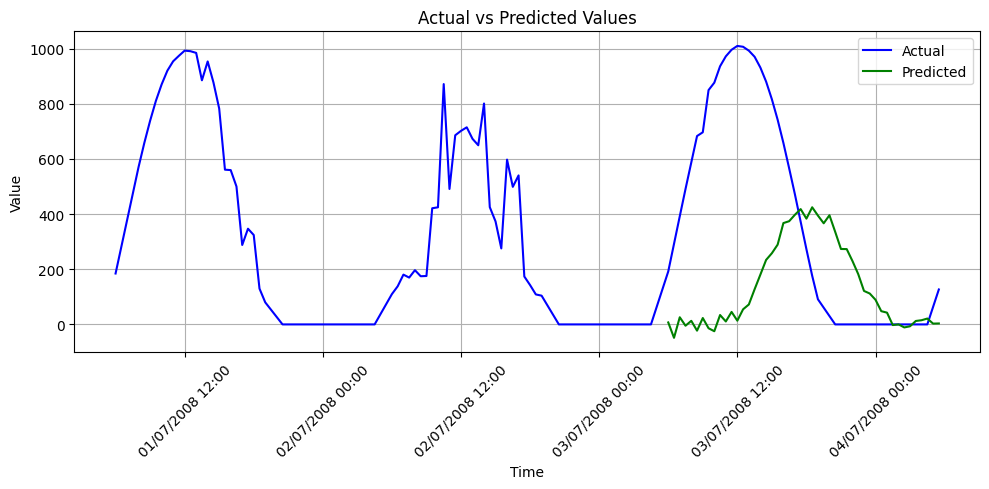

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


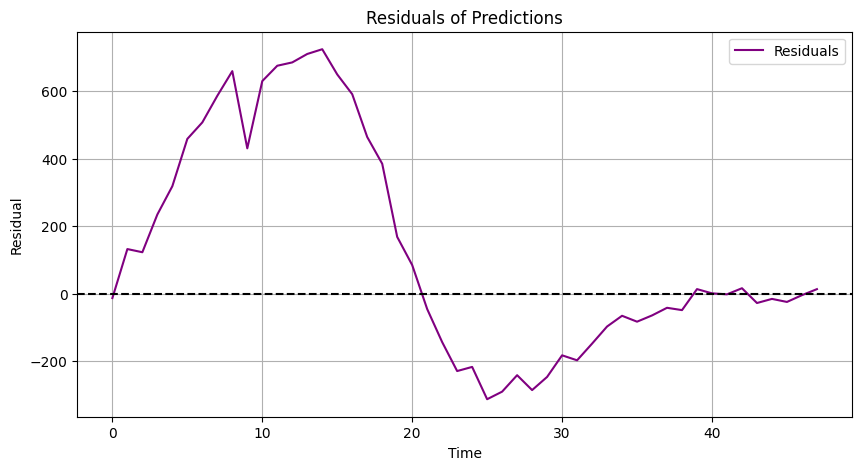

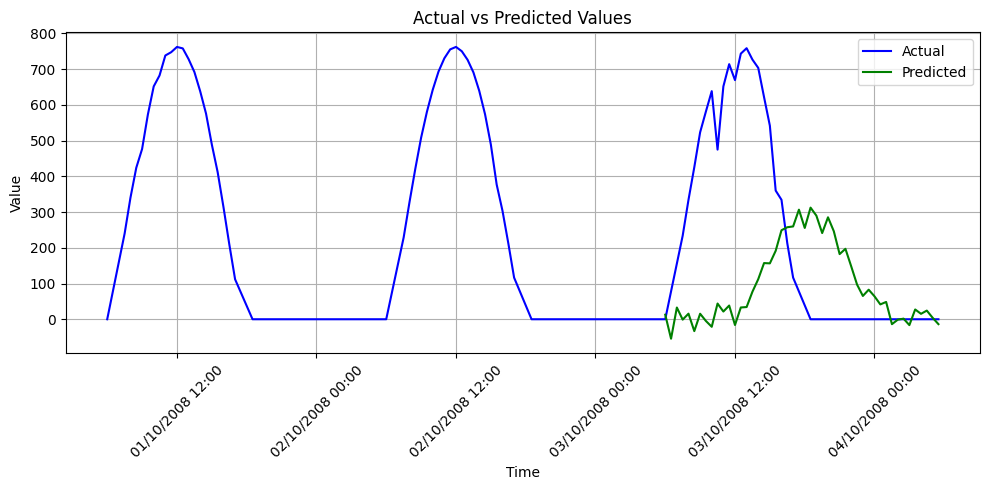

In [8]:
data_for_eval = DataSelectionForEvaluator(dataset)
time_stamps = ['2008-01-01 06:00:00', '2008-04-01 06:00:00', '2008-07-01 06:00:00', '2008-10-01 06:00:00']
for model_conf in model_configurations:
    model = env_dir_options.load_model(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}.keras'))
    history = json.load(open(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_history.json')))
    scaler_x = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_x.pkl'))
    scaler_y = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_y.pkl'))

    # Evaluation of the model in different timestamps

    for iter, time_stamp in enumerate(time_stamps):
        y_true, y_pred, extended_y_true = data_for_eval.data_selection(model_=model,
                                                                       time_stamp=time_stamp,
                                                                       num_look_back_steps=model_conf["model"]["training"][
                                                                           "n_past_steps"],
                                                                       num_forecast_steps=model_conf["model"]["training"][
                                                                           "n_forecast_steps"],
                                                                       columns_for_training=
                                                                       model_conf["model"]["training"][
                                                                           "columns_for_training"],
                                                                       scaler_x=scaler_x,
                                                                       scaler_y=scaler_y,
                                                                       date_index="timestamp",
                                                                       target_column="GHI")
    
        evaluator = ModelEvaluator(y_true, y_pred)
        if iter == 0:
            evaluator.plot_loss(history, 'Huber loss')
        evaluator.plot_residuals()
        evaluator.plot_actual_vs_predicted(extended_y_true, model_conf["model"]["training"]["n_past_steps"])

In [9]:
!zip -r models.zip models

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: models/ (stored 0%)
  adding: models/LSTM_2_look72_overlap36_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_2_look48_overlap1_history.json (deflated 62%)
  adding: models/LSTM_2_look48_overlap48_history.json (deflated 60%)
  adding: models/LSTM_2_look72_overlap72_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_2_look96_overlap48_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_2_look72_overlap72.keras (deflated 7%)
  adding: models/LSTM_2_look72_overlap1_history.json (deflated 61%)
  adding: models/LSTM_2_look96_overlap1_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_2_look96_overlap48_history.json (deflated 59%)
  adding: models/LSTM_2_look96_overlap96_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_2_look72_overlap1_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_2_look96_overlap96_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_2_look96_overlap1.keras (deflated 7%)
  adding: models/LSTM_2_look48_overlap48.keras (deflated 7%)
  adding: models/LSTM_2_look72_ov